In [ ]:
import pandas as pd
from datetime import datetime

time_stamp = pd.Timestamp(datetime(2017, 1, 1))
print("time_stamp")
display(time_stamp)

print("\ntime_stamp.year")
print(time_stamp.year)

print("\ntime_stamp.day_name()  (.weekday_name is obsolete)")
print(time_stamp.day_name())

time_stamp


Timestamp('2017-01-01 00:00:00')


time_stamp.year
2017

time_stamp.day_name()  (.weekday_name is obsolete)
Sunday


# **Period and Frequency**

In [ ]:
หprint(f"pd.Period('2017-01') = ")
display(pd.Period('2017-01'))

# convert frequency to daily
print("\npd.Period('2017-01').asfreq('D')")
display(pd.Period('2017-01').asfreq('D'))

# convert period to timestamp
print("\npd.Period('2017-01').to_timestamp()")
display(pd.Period('2017-01').to_timestamp())

# convert back to period
print("\npd.Timestamp('2017-01-01 00:00:00').to_period('M'))")
display(pd.Timestamp('2017-01-01 00:00:00').to_period('M'))

pd.Period('2017-01') = 


Period('2017-01', 'M')


pd.Period('2017-01').asfreq('D')


Period('2017-01-31', 'D')


pd.Period('2017-01').to_timestamp()


Timestamp('2017-01-01 00:00:00')


pd.Timestamp('2017-01-01 00:00:00').to_period('M'))


Period('2017-01', 'M')

# **Period Arithmetic**

In [ ]:
print("pd.Period('2017-01') + 2 = ")
display(pd.Period('2017-01') + 2)


display(pd.Timestamp('2017-01-31', freq='M') + 1)  # Deprecated !

pd.Period('2017-01') + 2 = 


Period('2017-03', 'M')

TypeError: ignored

In [ ]:
pd.Timestamp('2017-01-31', 'M') + 1

TypeError: ignored

# **Sequence of dates and times**

* `pd.date_range` : `start` , `end` , `periods` , `freq`

In [ ]:
print("pd.date_range(start='2017-1-1', periods=12, freq='M')")
display(pd.date_range(start='2017-1-1', periods=12, freq='M'))

# Each element in the DatetimeIndex is a Timestamp object
print("\n\n\npd.date_range(start='2017-1-1', periods=12, freq='M')[0]")
display(pd.date_range(start='2017-1-1', periods=12, freq='M')[0])

print("\n\n\npd.date_range(start='2017-1-1', periods=12, freq='M').to_period()")
display(pd.date_range(start='2017-1-1', periods=12, freq='M').to_period())

pd.date_range(start='2017-1-1', periods=12, freq='M')


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')




pd.date_range(start='2017-1-1', periods=12, freq='M')[0]


Timestamp('2017-01-31 00:00:00', freq='M')




pd.date_range(start='2017-1-1', periods=12, freq='M').to_period()


PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

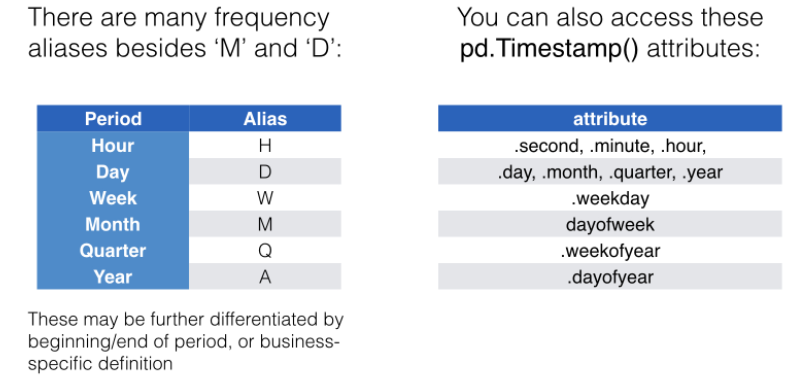

## **Your first time series**

You have learned above how to create a sequence of dates using `pd.date_range()`. You have also seen that each date in the resulting `pd.DatetimeIndex` is a `pd.Timestamp` with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the `dayofweek` and `weekday_name` for each date.

* Use `pd.date_range` to create seven dates starting from `'2017-1-1'` at (default) daily frequency. Use the arguments `start` and `periods`. Assign the result to `seven_days`.
* Iterate over each date in `seven_days` and in each iteration, print the `.dayofweek` and `.weekday_name` attributes.

### As of pandas version 1.1.5 the `.weekday_name` is obsolete.  Use `.day_name()` instead.

In [ ]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)
print("pd.date_range(start='2017-1-1', periods=7)")
display(pd.date_range(start='2017-1-1', periods=7))

# Iterate over the dates and print the number and name of the weekday
print("\n")
for day in seven_days:
    print(day.dayofweek, day.day_name())


pd.date_range(start='2017-1-1', periods=7)


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')



6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


# **Indexing and Resampling**

## **Getting Google stock prices**


In [ ]:
import pandas as pd
google = pd.read_csv('google.csv', parse_dates=["Date"]) 
google = google[google["Date"] > '2015-01-01'].dropna() # ทำให้ข้อมูลตรงกับในสไลด์
display(google.info())
print("\n")

display(google.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 365 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    504 non-null    datetime64[ns]
 1   Close   504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


None

,Date,Close
365,2015-01-02,524.81
368,2015-01-05,513.87
369,2015-01-06,501.96
370,2015-01-07,501.10
371,2015-01-08,502.68


# **Plotting google stock prices**



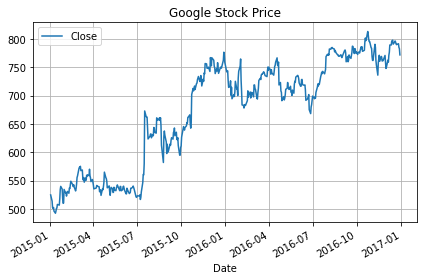

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

google = pd.read_csv('google.csv', parse_dates=["Date"]) 
google = google[google["Date"] > '2015-01-01'].dropna()
google.set_index("Date", inplace=True)
google.plot(title="Google Stock Price", grid="on")
plt.tight_layout()
plt.show()

In [ ]:
print('google["2015"]')
display(google["2015"])

print("\n\ngoogle['2015-3': '2016-2']")
display(google['2015-3': '2016-2'])

google["2015"]


,Close
Date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
...,...
2015-12-24,748.40
2015-12-28,762.51
2015-12-29,776.60




google['2015-3': '2016-2']


,Close
Date,
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33
2015-03-06,567.68
...,...
2016-02-23,695.85
2016-02-24,699.56
2016-02-25,705.75


# **.asfreq(): set frequency**

In [ ]:
display(google.asfreq('D').info())
print("\n\ngoogle.asfreq('D') contains many dates where stock was not bought or sold.")
display(google.asfreq('D'))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2015-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   504 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


None



google.asfreq('D') contains many dates where stock was not bought or sold.


,Close
Date,
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87
2015-01-06,501.96
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


# **.asfreq(): set frequency to be business day**

In [ ]:
google.asfreq('B')

print("\n\nBusiness days where no stock was traded")
print("google.asfreq('B')[google.asfreq('B')['Close'].isnull()]")
display(google.asfreq('B')[google.asfreq('B')['Close'].isnull()])




Business days where no stock was traded
google.asfreq('B')[google.asfreq('B')['Close'].isnull()]


,Close
Date,
2015-01-19,NaN
2015-02-16,NaN
2015-04-03,NaN
2015-05-25,NaN
2015-07-03,NaN
2015-09-07,NaN
2015-11-26,NaN
2015-12-25,NaN
2016-01-01,NaN


### **Create a time series of air quality data: pd.to_datetime()**

You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as `dtype` object in `pandas`.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of `pd.to_datetime()`.


* Inspect data using `.info()`.
* Use `pd.to_datetime` to convert the column `'date'` to dtype `datetime64`.
* Set the `'date'` column as index.
* Validate the changes by inspecting data using `.info()` again.
* Plot data using `subplots=True`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


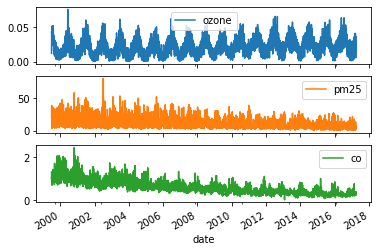

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data["date"] = pd.to_datetime(data["date"])

# Set date column as index
data.set_index("date", inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.tight_layout
plt.show()



### **Compare annual stock price trends**


* Create an empty `pd.DataFrame()` called `prices`.
* Iterate over a list containing the three years, 2013, 2014, and 2015, as `string`, and in each loop:
  * Use the iteration variable to select the data for this year and the column `price`.
  * Use `.reset_index()` with `drop=True` to remove the `DatetimeIndex`.
  * Rename the column `price` column to the appropriate `year`.
  * Use `pd.concat()` to combine the yearly data with the data in `prices` along `axis=1`.
* Plot `prices`.

prices table after filling in data


,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


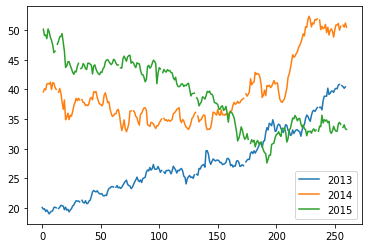

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

yahoo = pd.read_csv("yahoo.csv", parse_dates=["date"]).set_index('date')

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

print("prices table after filling in data")
display(prices.head())

# Plot prices
prices.plot()
plt.show()

# **Set and change time series frequency**

You have seen how to assign a frequency to a `DateTimeIndex`, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.


Inspect co using .info().
Use .asfreq() to set the frequency to calendar daily.
Show a plot of 'co' using subplots=True.
Change the the frequency to monthly using the alias 'M'.
Show another plot of co using subplots=True.

co


,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761




co.asfreq('D')


,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-02,NaN,NaN,NaN
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176


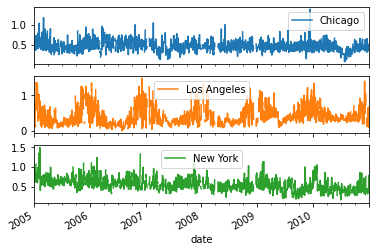



co.asfreq('M')


,Chicago,Los Angeles,New York
date,,,
2005-01-31,0.850000,0.800498,0.799479
2005-02-28,0.575000,0.397600,0.780729
2005-03-31,0.412500,0.432972,0.740672
2005-04-30,0.502083,0.291305,0.716382
2005-05-31,0.520834,0.292753,0.615625


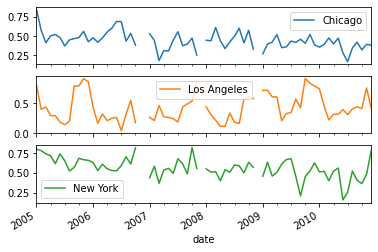

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

co = pd.read_csv("co_cities.csv", parse_dates=["date"]).set_index("date")
print("co")
display(co.head())

# Set the frequency to calendar daily
co = co.asfreq('D')
print("\n\nco.asfreq('D')")
display(co.head())

# Plot the data
co.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')
print("\n\nco.asfreq('M')")
display(co.head())

# Plot the data
co.plot(subplots=True)
plt.show()



# **`.shift()`: Moving data between past & future**

`.shift()`:
* defaults to `periods=1`
* 1 period in the futue

In [ ]:
import pandas as pd

google = pd.read_csv("google.csv", parse_dates=["Date"]).dropna()
google = google[google["Date"] > '2015-01-01'].set_index("Date")
google.rename(columns={"Close":"price"}, inplace=True)
display(google.info())

print("\n\ngoogle")
display(google.head())

print("\ngoogle shift")
google['shifted'] = google["price"].shift() # default: periods=1
display(google.head())

print("\n\nLead vs Lag")
google['lagged'] = google["price"].shift(periods=-1)
print("google.tail()")
display(google.tail())
print("\ngoogle.head()")
display(google.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


None



google


,price
Date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68



google shift


,price,shifted
Date,,
2015-01-02,524.81,NaN
2015-01-05,513.87,524.81
2015-01-06,501.96,513.87
2015-01-07,501.10,501.96
2015-01-08,502.68,501.10




Lead vs Lag
google.tail()


,price,shifted,lagged
Date,,,
2016-12-23,789.91,791.26,791.55
2016-12-27,791.55,789.91,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN



google.head()


,price,shifted,lagged
Date,,,
2015-01-02,524.81,NaN,513.87
2015-01-05,513.87,524.81,501.96
2015-01-06,501.96,513.87,501.10
2015-01-07,501.10,501.96,502.68
2015-01-08,502.68,501.10,496.17


## **Shifting stock prices across time**

The first method to manipulate time series is `.shift()`, which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the `DateTimeIndex`.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.


* Use `.asfreq()` to set the frequency of `google` to business daily.
* Add new columns `lagged` and `shifted` to `google` that contain the `Close` shifted by 90 business days into past and future, respectively.
* Plot the three columns of `google`.

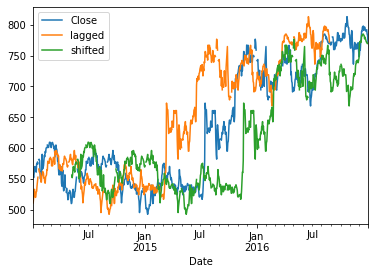

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(periods=90)

# Plot the google price series
google.plot()
plt.show()

## **Calculating stock price changes using `.diff()`**

Calculate absolute changes from current and shifted prices, and compare the result to the function `.diff()`.

We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to `yahoo`.

* Create a new column called `shifted_30` that contains the `'price'` shifted by 30 business days into the future.
* Subtract `'shifted_30'` from `'price'`, and assign the result to a new column, `'change_30'`.
* Apply `.diff()`, setting `periods` to `30`, and assign the result to a new column, `'diff_30'`.
* Inspect the last five rows of yahoo to verify the calculation.
* Subtract `diff_30` from `change_30` using the `.sub()` method and print the `.value_counts()` of the result to show both columns are equal.

In [ ]:
import pandas as pd

yahoo = pd.read_csv("yahoo.csv", parse_dates=["date"], index_col="date")
yahoo = yahoo.asfreq('B')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo['price'].shift(periods=30)
display(yahoo.head(40))

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail(6))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())
# print((yahoo['change_30'] - yahoo['diff_30']).value_counts()) ก็ได้


,price,shifted_30
date,,
2013-01-02,20.08,NaN
2013-01-03,19.78,NaN
2013-01-04,19.86,NaN
2013-01-07,19.40,NaN
2013-01-08,19.66,NaN
2013-01-09,19.33,NaN
2013-01-10,18.99,NaN
2013-01-11,19.29,NaN
2013-01-14,19.43,NaN


            price  shifted_30  change_30  diff_30
date                                             
2015-12-24  34.11       33.23       0.88     0.88
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


# **Plotting multi-period returns**

The last time series method you have learned  was `.pct_change()`. Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded `'GOOG'` stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to `google`.

* Create the columns `'daily_return'`, `'monthly_return'`, and `'annual_return'` that contain the `pct_change()` of `'Close'` for `1`, `30` and `360` calendar days, respectively, and multiply each by `100`.
* Plot the result using `subplots=True`.

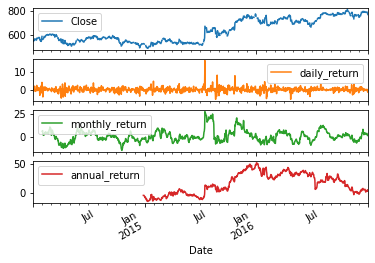

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

google = pd.read_csv("google.csv", parse_dates=["Date"], index_col="Date")
google = google.asfreq('D')

# Create daily_return
google['daily_return'] = google['Close'].pct_change()*100

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30)*100

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360)*100

# Plot the result
google.plot(subplots=True)
plt.show()


# **Comparing stock performance**

* Stock price series: hard to compare at different levels
* Simple solution: normalize price series to start at `100`
* Divide all prices by firrst in series, multiply by `100`
  * Same starting point
  * All prices relative to starting point
  * Difference to starting point in percentage points

## **Normalizing a single series**

In [ ]:
import pandas as pd

google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date').dropna().sort_index().rename(columns={"Close":"price"})
google.head(3)

,price
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10


## **Find the first price**

In [ ]:
first_price = google["price"].iloc[0] # int-based selection
first_price

556.0

## **Plot a normalized series**



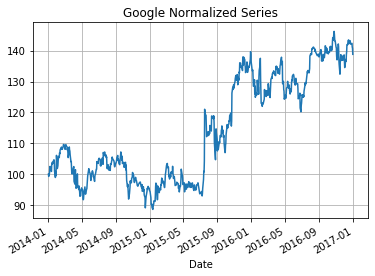

In [ ]:
import matplotlib.pyplot as plt

normalized = google["price"].div(first_price).mul(100)
normalized.plot(title='Google Normalized Series', grid="on")
plt.show()

# **Normalizing multiple series**

In [ ]:
prices = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
display(prices.info())
display(prices.head())
normalized = prices.div(prices.iloc[0])
display(normalized.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


None

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001963,0.991337,1.005900,1.000000,0.996292,1.017680,0.993453,0.997274,1.011111,1.015527,0.999299,1.001719
2010-01-06,0.985934,0.983888,0.987677,0.995604,0.999176,1.006818,1.054664,0.995327,1.010741,1.046582,0.988792,0.994328
2010-01-07,0.983971,0.974879,0.970874,0.989011,1.011949,1.026520,1.072668,0.988707,0.998519,1.046761,0.971979,0.986765
2010-01-08,0.990514,0.983541,0.997162,0.993407,1.016069,1.007107,1.085106,0.989097,1.001852,1.058362,0.965674,1.034204


## **Comparing with a benchmark**



In [ ]:
index = pd.read_csv('sp500.csv', parse_dates=['date'])
index = index[index["date"] >= '2010-01-04'].set_index("date")
index.info()

prices = pd.concat([prices, index], axis=1).dropna()
display(prices.info())
display(prices.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
 12  SP500   1761 non-null   float64
dtypes: float64(13)
memory usage: 192.6 KB


None

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,SP500
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18,1132.99
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28,1136.52
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85,1137.14
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41,1141.69
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17,1144.98


## **Plotting multiple series compared to SP500 as a benchmark**

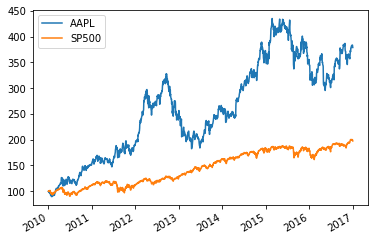

2010-01-04    0.000000
2010-01-05   -0.115294
2010-01-06   -1.772895
2010-01-07   -2.370758
2010-01-08   -2.006904
dtype: float64

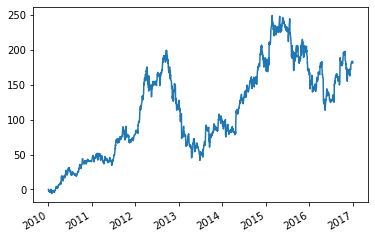

In [ ]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized[["AAPL", "SP500"]].plot()
plt.show()

diff = normalized["AAPL"].sub(normalized['SP500'], axis=0)
display(diff.head())

diff.plot()
plt.show()

### **Compare the performance of several asset classes**

You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.


* Import `'asset_classes.csv'`, using `.read_csv()` to parse dates in the `'DATE'` column and set this column as the index, then assign the result to prices.
* Select the first price for each series using `.iloc[0]` on prices and assign the result to `first_prices`.
* Divide prices by `first_prices`, multiply by `100` and assign the result to `normalized`.
* Plot `normalized`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


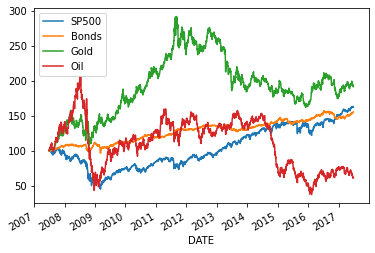

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col=['DATE'])

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices / first_prices * 100

# Plot normalized
normalized.plot()
plt.show()


# **Comparing stock prices with a benchmark**

You also learned how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

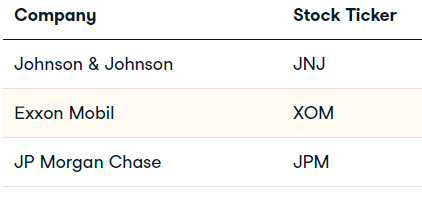

* Use `pd.read_csv()` to import `'nyse.csv'` and `'dow_jones.csv'`, creating a `DatetimeIndex` for each from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `stocks` and `dow_jones`, respectively.
* Use `pd.concat()` along `axis=1` to combine `stocks` and `dow_jones` and assign the result to `data`. Inspect the `.info()` of `data`.
* Divide `data` by the first value for each series, multiply by `100` and plot the result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


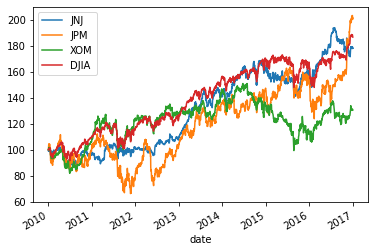

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import stock prices and index here
stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
(data / data.iloc[0] * 100).plot()
plt.show()

# **Plot performance difference vs benchmark index**

You learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (`MSFT`) and Apple (`AAPL`) to the S&P 500 over the last 10 years.

* Create the list `tickers` containing the two stock symbols.
* Use `pd.read_csv()` to import `'msft_aapl.csv'` and `'sp500.csv'`, creating a `DatetimeIndex` for each from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `stocks` and `sp500`, respectively.
* Use `pd.concat()` to concatenate `stocks` and `sp500` along `axis=1`, apply `.dropna()` to drop all missing values, and assign the result to `data`.
* Normalize `data` by dividing by the first price, multiply by `100` and assign the output to `normalized`.
* Select `tickers` from `normalized`, and subtract `normalized['SP500']` with keyword `axis=0` to align the indexes, then plot the result.

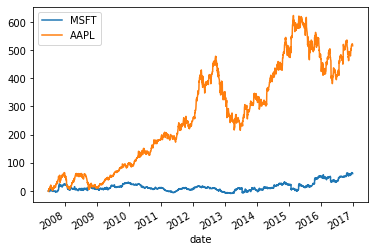

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create tickers
tickers = ["MSFT", "AAPL"]

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()


# **Changing the frequency: resampling**

* `.asfreq()`
* `.reindex()`
* `.resample()`

### Quarterly data is set default at the end of the month.

In [ ]:
import pandas as pd

dates = pd.date_range(start="2016", periods=4, freq="Q")
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
display(quarterly)

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [ ]:
monthly = quarterly.asfreq("M")
display(monthly)
monthly = monthly.to_frame('baseline')
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


# **Upsampling: fill methods**

In [ ]:
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


# **Add missing months: `.reindex()`**

In [ ]:
dates = pd.date_range(start='2016', periods=12, freq='M')
print("dates")
display(dates)
print("\nquarterly")
display(quarterly)
print("\nquarterly.reindex(dates)")
display(quarterly.reindex(dates))

dates


DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')


quarterly


2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64


quarterly.reindex(dates)


2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

### **Convert monthly to weekly data**

You have learned how to use `.reindex()` to conform an existing time series to a `DateTimeIndex` at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

* Create `monthly_dates` using `pd.date_range` with `start`, `end` and frequency alias `'M'`.
* Create and print the `pd.Series` monthly, passing the list `[1, 2]` as the `data` argument, and using `monthly_dates` as `index`.
* Create `weekly_dates` using `pd.date_range` with `start`, `end` and frequency alias `'W'`.
* Apply `.reindex()` to monthly three times: first without additional options, then with `bfill` and then with `ffill`, `print()`-ing each result.

In [ ]:
import pandas as pd

# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq="M")

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly, "\n")

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq="W")

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates), "\n")
print(monthly.reindex(weekly_dates, method="bfill"), "\n")
print(monthly.reindex(weekly_dates, method="ffill"), "\n")


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64 

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64 

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64 

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64 



### **Create weekly from monthly unemployment data**

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

* Use `pd.read_csv()` to import `'unemployment.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data`.
* Convert `data` to weekly frequency using `.asfreq()` with the alias `'W'` and show the first five rows.
* Convert again to weekly frequency, adding the option `'bfill'` and show the first five rows.
* Create weekly series, now adding the option `'ffill'`, assign to `weekly_ffill` and show the first five rows.
* Plot `weekly_ffill` starting in 2015.

data


,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0



(data.asfreq('W').head())


,UNRATE
date,
2000-01-02,NaN
2000-01-09,NaN
2000-01-16,NaN
2000-01-23,NaN
2000-01-30,NaN



data.asfreq('W', method='bfill').head()


,UNRATE
date,
2000-01-02,4.1
2000-01-09,4.1
2000-01-16,4.1
2000-01-23,4.1
2000-01-30,4.1



data.asfreq('W', method='ffill').head()


,UNRATE
date,
2000-01-02,4.0
2000-01-09,4.0
2000-01-16,4.0
2000-01-23,4.0
2000-01-30,4.0


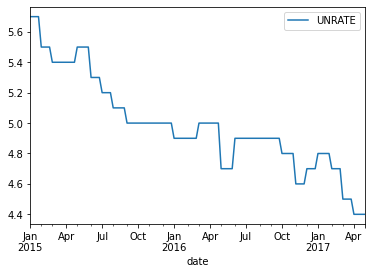

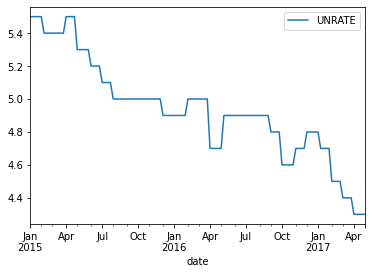

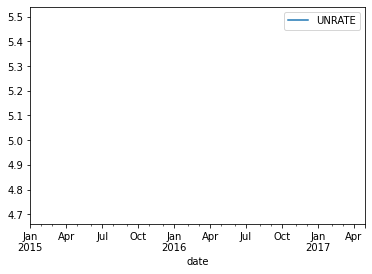

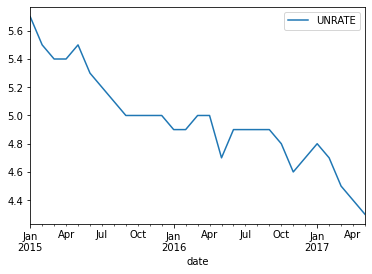

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Import data here
data = pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col='date')
print("data")
display(data.head())

# Show first five rows of weekly series
print("\n(data.asfreq('W').head())")
display(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print("\ndata.asfreq('W', method='bfill').head()")
display(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
print("\ndata.asfreq('W', method='ffill').head()")
weekly_ffill = data.asfreq('W', method='ffill')
display(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
data.asfreq('W', method='bfill')['2015':].plot()
data.asfreq('W')['2015':].plot()
data['2015':].plot()
plt.show()




# **Upsampling**

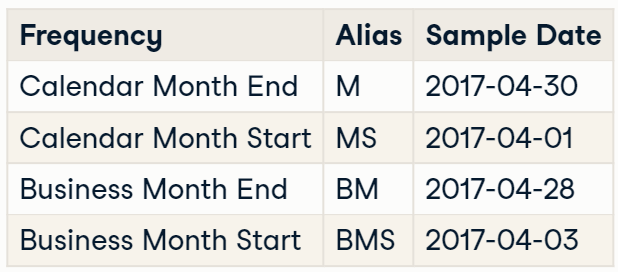

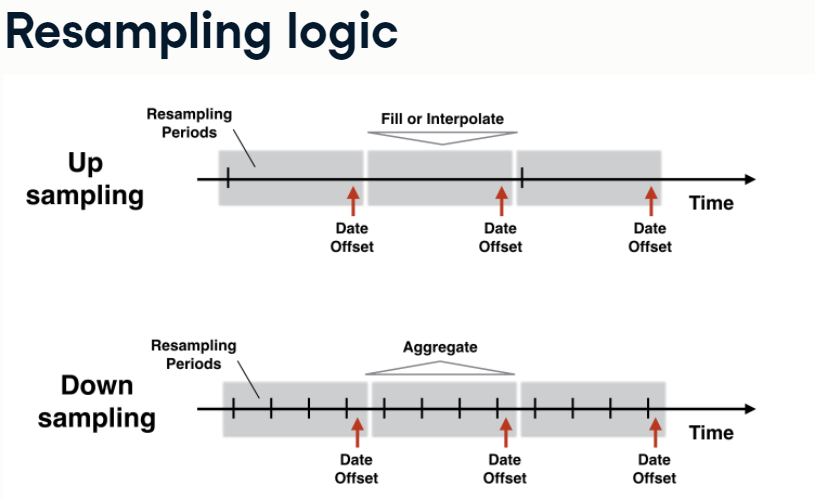

In [ ]:
import pandas as pd

unrate = pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col='date')
display(unrate.info())
display(unrate.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


None

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [ ]:
display(unrate.asfreq('M').head())
display(unrate.asfreq('MS').head())
display(unrate.resample('MS').asfreq().head())

,UNRATE
date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,NaN
2000-05-31,NaN


,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


## **Quarterly GDP growth**

In [ ]:
gdp = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date').rename(columns={"gdp_growth": "gdp"})
display(gdp.info())
display(gdp.head())
print("\n\ngdp.resample('MS').asfreq()")
display(gdp.resample('MS').asfreq().head(12))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


None

,gdp
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7




gdp.resample('MS').asfreq()


,gdp
date,
2007-01-01,0.2
2007-02-01,NaN
2007-03-01,NaN
2007-04-01,3.1
2007-05-01,NaN
2007-06-01,NaN
2007-07-01,2.7
2007-08-01,NaN
2007-09-01,NaN


## **Ffill monthly real GDP growth**


In [ ]:
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill')

gdp_1.head()

,gdp_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


# **Interpolate monthly real GDP growth**

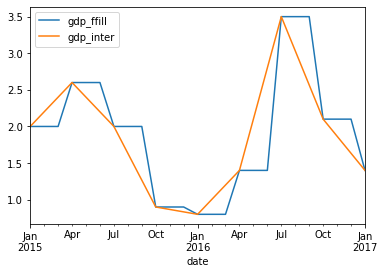

In [ ]:
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter')
gdp_2.head()

pd.concat([gdp_1, gdp_2], axis=1).loc['2015':].plot()
plt.show()

## **Combine GDP growth & unemployment**

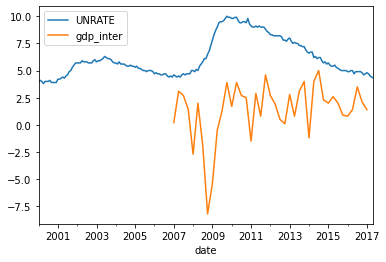

In [ ]:
pd.concat([unrate, gdp_2], axis=1).plot()
plt.show()

### **Use interpolation to create weekly employment data**
You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new `.interpolate()` method that you learned about in this video.

* Inspect monthly using `.info()`.
* Create a `pd.date_range(`) with weekly dates, using the `.min()` and `.max()` of the index of `monthly` as `start` and `end`, respectively, and assign the result to `weekly_dates`.
* Apply `.reindex()` using `weekly_dates` to monthly and assign the output to `weekly`.
* Create new columns `'ffill'` and `'interpolated'` by applying `.ffill()` and `.interpolate()` to `weekly.UNRATE`.
* Show a plot of `weekly`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


None

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
2010-06-01,9.4
2010-07-01,9.4
2010-08-01,9.5
2010-09-01,9.5




monthly.reindex(pd.date_range(start=monthly.index.min(),end=monthly.index.max(), freq='W'))


,UNRATE
2010-01-03,NaN
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,NaN
2010-01-31,NaN




weekly after filling in


,UNRATE,ffill,interpolated
2010-01-03,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN
2010-01-17,NaN,NaN,NaN
2010-01-24,NaN,NaN,NaN
2010-01-31,NaN,NaN,NaN
2010-02-07,NaN,NaN,NaN
2010-02-14,NaN,NaN,NaN
2010-02-21,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN
2010-03-07,NaN,NaN,NaN


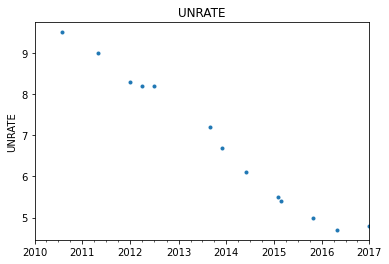

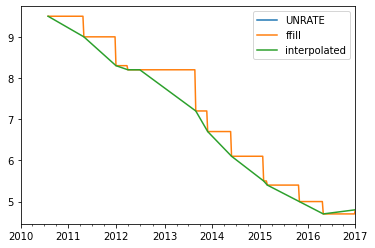

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

monthly = pd.read_csv("unrate.csv", parse_dates=["DATE"], index_col="DATE")
display(monthly.info())
display(monthly.head(10))

# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(),end=monthly.index.max(), freq='W')

# Reindex monthly to weekly data: should result in NaN as the new index doesn't match
weekly = monthly.reindex(weekly_dates)
print("\n\nmonthly.reindex(pd.date_range(start=monthly.index.min(),end=monthly.index.max(), freq='W'))")
display(weekly.head())

# Create ffill and interpolated columns
weekly['ffill'] = weekly["UNRATE"].ffill()
weekly['interpolated'] = weekly["UNRATE"].interpolate()
print("\n\nweekly after filling in")
display(weekly.head(40))

# Plot weekly
weekly["UNRATE"].plot(marker='.')
plt.ylabel("UNRATE")
plt.title("UNRATE")
plt.show()

weekly.plot()
plt.show()


ดูเหมือนจะยังมีปัญหาอยู่ในช่วงแรกๆของข้อมูลที่ค่าไม่ตรงกัน จะไม่มีการ ffill หรือ interpolate ค่าใดๆทั้งสิ้น จากกราฟจะเห็นว่าข้อมูลต้นฉบับเริ่มตั้งแต่ 1 มค 2010 แต่กราฟพอจะเริื่มให้พล็อตได้ ก็หลังจาก 1 สค 2010

### **Interpolate debt/GDP and compare to unemployment**

Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

* Use `pd.read_csv()` to import `'debt_unemployment.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data`. `print()` the `.info()` of the `data`.
* Apply `.interpolate()` to `data` and assign this to `interpolated`, then inspect the result.
* Plot `interpolated` with 'Unemployment' on the `secondary_y` axis.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6
2010-06-01,NaN,9.4
2010-07-01,90.06437,9.4
2010-08-01,NaN,9.5
2010-09-01,NaN,9.5


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.003860,9.8
2010-02-01,87.559397,9.8
2010-03-01,88.114933,9.9
2010-04-01,88.670470,9.9
2010-05-01,89.135103,9.6
2010-06-01,89.599737,9.4
2010-07-01,90.064370,9.4
2010-08-01,90.738977,9.5
2010-09-01,91.413583,9.5


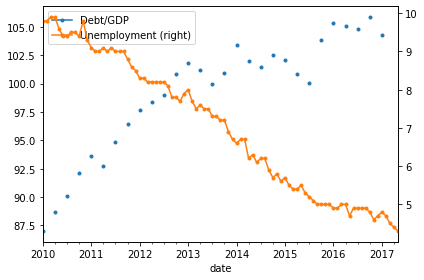

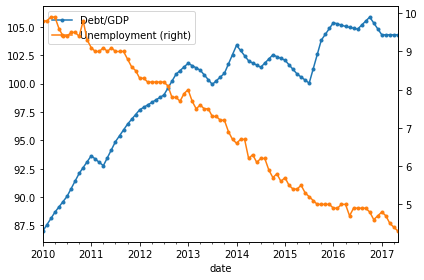

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import & inspect data here
data = pd.read_csv("debt_unemployment.csv", parse_dates=['date'], index_col="date")
print(data.info())
display(data.head(12))

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())
display(interpolated.head(12))

# Plot interpolated data here
data.plot(secondary_y="Unemployment", marker='.')
plt.tight_layout()
plt.show()

interpolated.plot(secondary_y="Unemployment", marker='.')
plt.tight_layout()
plt.show()


# **Downsampling & aggregation methods**

  * hour to day
  * day to month, etc
* How to represent the existing values at the new date?
  * Mean, median, last value?

In [ ]:
import pandas as pd

ozone = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()
display(ozone.head())

ozone = ozone.resample("D").asfreq()
print("\n\nozone.resample('D').asfreq()")
display(ozone.resample("D").asfreq().info())
display(ozone.resample("D").asfreq().head())

print("\n\nozone.resample('MS').asfreq()")
print("นี่เป็นแค่การเอาข้อมูลที่มีอยู่แล้ว มาใส่เป็นรายเดือน ไม่ใช่การ aggregate แต่อย่างใด")
print("ใหห้สังเกตว่า ใช้ MS(Month Start) ข้อมูลของวันที่ 2000-01-01 ยังเท่าเดิม")
display(ozone.resample("MS").asfreq().info())
display(ozone.resample("MS").asfreq().head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754




ozone.resample('D').asfreq()
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


None

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754




ozone.resample('MS').asfreq()
นี่เป็นแค่การเอาข้อมูลที่มีอยู่แล้ว มาใส่เป็นรายเดือน ไม่ใช่การ aggregate แต่อย่างใด
ใหห้สังเกตว่า ใช้ MS(Month Start) ข้อมูลของวันที่ 2000-01-01 ยังเท่าเดิม
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2000-01-01 to 2017-03-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   200 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

,Ozone
date,
2000-01-01,0.004032
2000-02-01,0.010583
2000-03-01,0.007418
2000-04-01,0.017631
2000-05-01,0.022628


# **Creating monthly data**



In [ ]:
import pandas as pd

ozone = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')

print("\n\nozone.resample('M').mean()")
display(ozone.resample("M").mean().head())

print("\n\nozone.resample('M').agg(['mean', 'median', 'std'])")
display(ozone.resample("M").agg(['mean', 'median', 'std']).head())



ozone.resample('M').mean()


,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535




ozone.resample('M').agg(['mean', 'median', 'std'])


Ozone                    
                mean    median       std
date                                    
2000-01-31  0.010443  0.009486  0.004755
2000-02-29  0.011817  0.010726  0.004072
2000-03-31  0.016810  0.017004  0.004977
2000-04-30  0.019413  0.019866  0.006574
2000-05-31  0.026535  0.026018  0.008409

# **Plotting resampled data**

`ax=ax` plot other graphs in the same figure

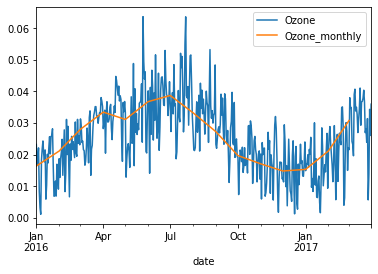

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ozone = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')

ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)
plt.show()

### **Compare weekly, monthly and annual ozone trends for NYC & LA**

* Use `pd.read_csv()` to import `'ozone.csv'` and set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, assign the result to `ozone` and inspect using `.info()`.
* Apply `.resample()` with weekly frequency (`'W'`) to `ozone`, aggregate using `.mean()` and plot the result.
* Repeat with monthly (`'M'`) and annual (`'A'`) frequencies, plotting each result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


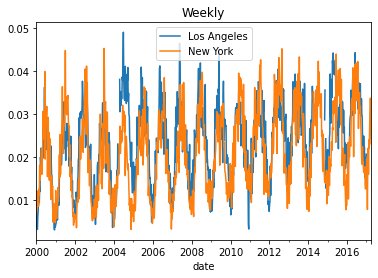

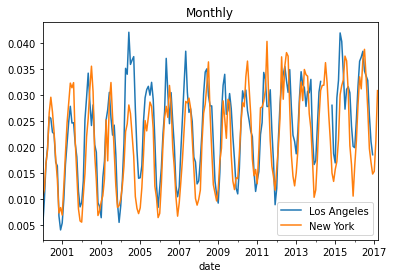

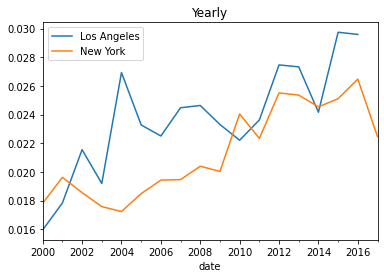

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect data here
ozone = pd.read_csv("ozone_nyla.csv", parse_dates=["date"], index_col="date")
print(ozone.info())
display(ozone.head())

# Calculate and plot the weekly average ozone trend
ozone.resample("W").mean().plot()
plt.title('Weekly')
plt.show()


# Calculate and plot the monthly average ozone trend
ozone.resample("M").mean().plot()
plt.title('Monthly')
plt.show()


# Calculate and plot the annual average ozone trend
ozone.resample("A").mean().plot()
plt.title('Yearly')
plt.show()



### **Compare monthly average stock prices for Facebook and Google**

* Use `pd.read_csv()` to import `'stocks.csv'` and set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, assign the result to stocks and inspect using `.info()`.
* Create `monthly_average` by applying `.resample()` with monthly frequency to data, using `.mean()` to aggregate. Plot the result using `subplots`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


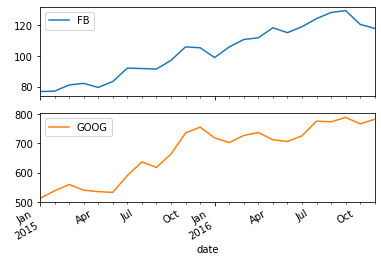

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect data here
stocks = pd.read_csv('goog_fb.csv', parse_dates=['date'], index_col='date')

print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)

plt.show()

### **Compare quarterly GDP growth rate and stock returns**

You can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias `'QS'`, and aggregating using the `.first()` observations.


* Use `pd.read_csv()` to import `'gdp_growth.csv'` and `'djia.csv'`, for both set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, and assign the results to `gdp_growth` and `djia` respectively, then inspect using `.info()`.
* Resample `djia` using frequency alias `'QS'`, aggregate using `.first()`, and assign to `djia_quarterly`.
* Apply `.pct_change()` to `djia_quarterly` and `.mul()` by `100` to obtain vdjia_quarterly_return`.
* Use `pd.concat()` to concatenate `gdp_growth` and `djia_quarterly_return` along `axis=1`, and assign to `data`. Rename the columns using `.columns` and the new labels `'gdp'` and `'djia'`, then `.plot()` the results.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


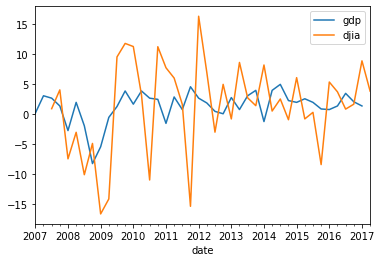

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')


# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')

print(gdp_growth.info())
print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.show()

### **Visualize monthly mean, median and standard deviation of S&P500 returns**

Explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

* Use `pd.read_csv()` to import `'sp500.csv'`, set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, assign the results to `sp500`, and inspect using `.info()`.
* Convert `sp500` to a `pd.Series()` using `.squeeze()`, and apply .`pct_change()` to calculate `daily_returns`.
* `.resample()` `daily_returns` to month-end frequency (alias: `'M'`), and apply `.agg()` to calculate `'mean'`, `'median'`, and `'std'`. Assign the result to `stats`.
* `.plot()` `stats`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


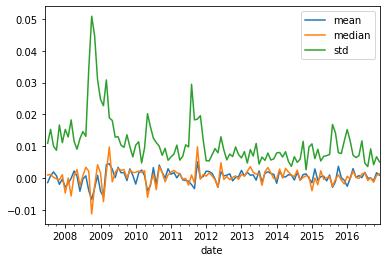

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

print(sp500.info())

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show()

# **Calculating a rolling average**

In [ ]:
import pandas as pd

data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date').dropna()
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


## **Unlike ordinary mean calculation, `rolling().mean()` cannot be computed if the window contains missing value**

In [ ]:
import pandas as pd

print("data.rolling(window=2).mean().head()")
display(data.rolling(window=2).mean().head())

print(f"\n(556.00 + 551.95)/2 = {(556.00 + 551.95)/2}\n(551.95 + 558.10)/2 = {(551.95 + 558.10)/2:.3f}")

data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
print("\n\n\nNA values are not dropped")
display(data.head())
print("\n\ndata.rolling(window=2).mean().head()")
display(data.rolling(window=2).mean().head())

data.rolling(window=2).mean().head()


,Close
Date,
2014-01-02,NaN
2014-01-03,553.975
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN



(556.00 + 551.95)/2 = 553.975
(551.95 + 558.10)/2 = 555.025



NA values are not dropped


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10




data.rolling(window=2).mean().head()


,Close
Date,
2014-01-02,NaN
2014-01-03,553.975
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN


### **Calendar Days**

In [ ]:
import pandas as pd

data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

display(data.head())
display(data.rolling(window=2).mean().head())
display(data.rolling(window='2D').mean().head()) # '2D' is calendar days

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


,Close
Date,
2014-01-02,NaN
2014-01-03,553.975
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN


,Close
Date,
2014-01-02,556.000
2014-01-03,553.975
2014-01-04,551.950
2014-01-05,NaN
2014-01-06,558.100


# **90 day rolling mean**



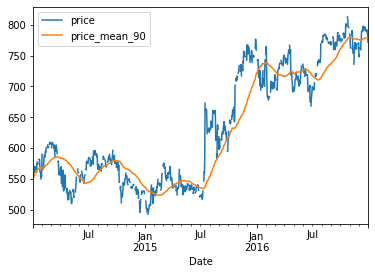

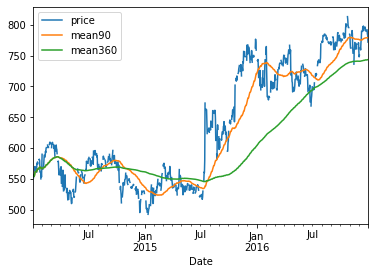

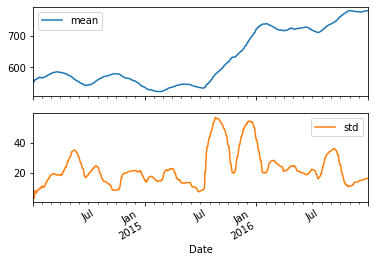

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date').rename(columns = {"Close":"price"})

r90 = data.rolling(window='90D').mean()
data.join(r90.add_suffix('_mean_90')).plot()
plt.show()

data['mean90'] = r90
r360 = data['price'].rolling(window='360D').mean()
data['mean360'] = r360
data.plot()
plt.show()

r = data["price"].rolling('90D').agg(['mean', 'std'])
r.plot(subplots = True)
plt.show()

# **Rolling Quantile**

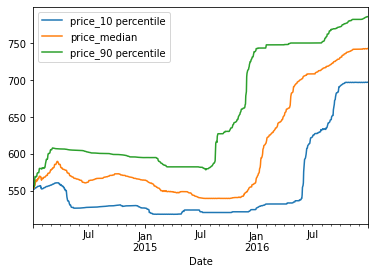

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date').rename(columns = {"Close":"price"})

rolling = data.rolling('360D')
q10 = rolling.quantile(0.1).add_suffix('_10 percentile')
median = rolling.median().add_suffix('_median')
q90 = rolling.quantile(0.9).add_suffix('_90 percentile')
pd.concat([q10, median, q90], axis=1).plot()
plt.show()

### **Rolling average air quality since 2010 for new york city**

You'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.


* Use `pd.read_csv()` to import `'ozone.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data`.
* Add the columns `'90D'` and `'360D'` containing the `90` and `360` rolling calendar day `.mean()` for the column `'Ozone'`.
* Plot `data` starting 2010, setting `'New York City'` as `title`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


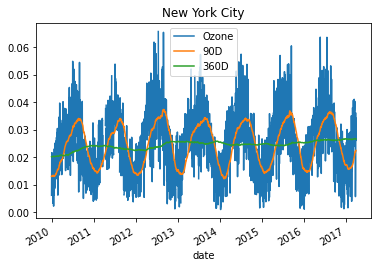

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data['Ozone'].rolling('90D').mean()
data['360D'] = data['Ozone'].rolling('360D').mean()

# Plot data
data['2010':].plot()
plt.title('New York City')
plt.show()

### **Rolling 360-day median & std. deviation for nyc ozone data since 2000**

You can calculate several rolling statistics using the `.agg()` method, similar to `.groupby()`.

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and `.agg()` to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

* Use `pd.read_csv()` to import `'ozone.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, assign the result to `data`, and drop missing values using `.dropna()`.
* Select the `'Ozone'` column and create a `.rolling()` window using 360 periods, apply `.agg()` to calculate the `mean` and `std`, and assign this to `rolling_stats`.
* Use `.join()` to concatenate `data` with `rolling_stats`, and assign to `stats`.
* Plot `stats` using `subplots`.

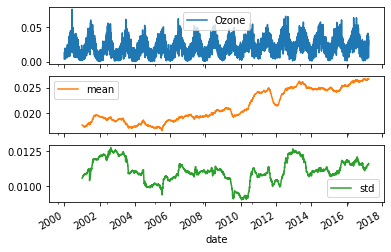

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(window=360).agg(['mean', 'std'])
# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()



### **Rolling quantiles for daily air quality in nyc**

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

* Apply `.resample()` with daily frequency `'D'` to `data` and apply .`interpolate()` to fill missing values, and reassign to `data`.
* Inspect the result using `.info()`.
* Create a `.rolling()` window using `360` periods, select the column `'Ozone'`, and assign the result to `rolling`.
* Insert three new columns, `'q10'`, `'q50'` and `'q90'` into `data`, calculating the respective quantiles from `rolling`.
* Plot `data`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None


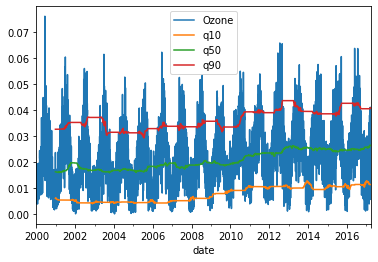

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data['Ozone'].rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.median()
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()
plt.show()

# **Expanding window functions with pandas**

In [ ]:
import pandas as pd

df = pd.DataFrame({'data': range(5)})
df['expanding sum'] = df["data"].expanding().sum()
df['cumulative sum'] = df["data"].cumsum()
df['expanding min'] = df["data"].expanding().min()
df['cumulative min'] = df['data'].cummin()
df

,data,expanding sum,cumulative sum,expanding min,cumulative min
0,0,0.0,0,0.0,0
1,1,1.0,1,0.0,0
2,2,3.0,3,0.0,0
3,3,6.0,6,0.0,0
4,4,10.0,10,0.0,0


# **Running return**

* Single period return: `.pct_change()`
$$r_t = \frac{P_t}{P_{t-1}}-1$$
* Gross return-one period: `.pct_change() + 1`
$$1 + r_t$$
* Multi-period return: `(1 + .pct_change()).cumprod() - 1`
$$R_T = (1 + r_1)(1+r_2)\ldots(1+r_T) - 1$$

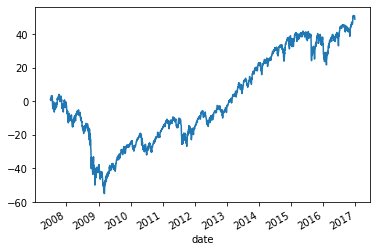

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect ozone data here
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

pr = data["SP500"].pct_change() # period return
pr_plus_one = 1 + pr # Gross return-one period
cumulative_return = pr_plus_one.cumprod() - 1  # Multi-period return
(cumulative_return * 100).plot()
plt.show()

# **Running min & max**



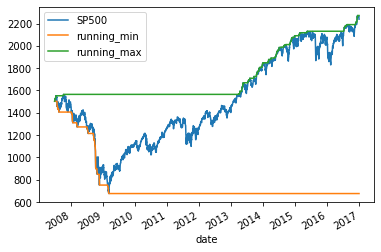

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
pr = data["SP500"].pct_change()
pr_plus_one = 1 + pr
cumulative_return = pr_plus_one.cumprod() - 1

data['running_min'] = data["SP500"].expanding().min()
data['running_max'] = data["SP500"].expanding().max()
data.plot()
plt.show()

# **Rolling annual rate of return**

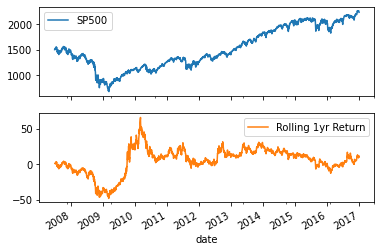

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

pr = data["SP500"].pct_change() # period return
r = pr.rolling('360D').apply(multi_period_return)
data['Rolling 1yr Return'] = r.mul(100)
data.plot(subplots=True)
plt.show()

## **ทำความเข้าใจกับการทำงานของฟังก์ชัน multi_period_return ร่วมกับ rolling**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    

pr = data["SP500"].pct_change() # period return
r = pr.rolling(window=3).apply(multi_period_return)

display(pr.head(6))
print(f"\n(1+0.010696)(1+0.003580)(1+0.000348) - 1 = {(1+0.010696)*(1+0.003580)*(1+0.000348) - 1:.6f}\n(1+0.003580)(1+0.000348)(1+0.003304) - 1 = {(1+0.003580)*(1+0.000348)*(1+0.003304) - 1:.6f}\n(1+0.000348)(1+0.003304)(1+0.000921) - 1 = {(1+0.000921)*(1+0.000348)*(1+0.003304) - 1:.6f}\n")
display(r.head(6))

date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
2007-07-09    0.000921
Name: SP500, dtype: float64


(1+0.010696)(1+0.003580)(1+0.000348) - 1 = 0.014667
(1+0.003580)(1+0.000348)(1+0.003304) - 1 = 0.007246
(1+0.000348)(1+0.003304)(1+0.000921) - 1 = 0.004578



date
2007-06-29         NaN
2007-07-02         NaN
2007-07-03         NaN
2007-07-05    0.014667
2007-07-06    0.007246
2007-07-09    0.004577
Name: SP500, dtype: float64

### **Cumulative sum vs .diff()**

The cumulative sum method has in fact the opposite effect of the `.diff()` method.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

* Apply `.diff()` to data, drop missing values, and assign the result to `differences`.
* Use `.first('D')` to select the first price from `data`, and assign it to `start_price`.
* Use `.append()` to combine `start_price` and `differences`, apply `.cumsum()` and assign this to `cumulative_sum`.
* Use `.equals()` to compare `data` and `cumulative_sum`, and print the result.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date').dropna()
display(data.head())

# Calculate differences
differences = data.diff().dropna()
print("\ndata.diff().dropna()")
display(data.diff().dropna().head())

# Select start price
start_price = data.first('D')
print(f"\ndata.first('D') = ")
display(data.first('D'))

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()
print("\nstart_price.append(differences)")
display(start_price.append(differences).head())
# Validate cumulative sum equals data
print("\n", data.equals(cumulative_sum))




,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04



data.diff().dropna()


,Close
Date,
2014-01-03,-4.05
2014-01-06,6.15
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49



data.first('D') = 


,Close
Date,
2014-01-02,556.0



start_price.append(differences)


,Close
Date,
2014-01-02,556.00
2014-01-03,-4.05
2014-01-06,6.15
2014-01-07,10.76
2014-01-08,1.18



 True


### **Cumulative return on $1,000 invested in google vs apple**

To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google (`'GOOG'`) or Apple (`'AAPL'`) in 2010.

* Define a variable `investment` with the value `1000`.
* Calculate returns by applying `.pct_change()` to `data`.
* Add `1` to returns and assign this to `returns_plus_one`, then apply `.cumprod()` to `returns_plus_one` and assign the result to `cumulative_return`.
* Multiply `cumulative_return` by `investment`, and plot the result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71



data.pct_change()


,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345
...,...,...
2017-05-24,-0.002991,0.006471
2017-05-25,0.003456,0.015268
2017-05-26,-0.001690,0.001991


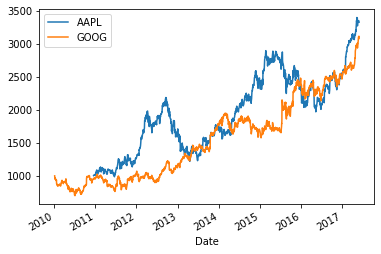

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
data.info()
display(data.head())

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()
print("\ndata.pct_change()")
display(data.pct_change())


# Calculate the cumulative returns here
returns_plus_one = 1 + returns
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul (investment).plot()
plt.show()



### **Cumulative return on $1,000 invested in google vs apple**

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

* Define a `multi_period_return()` function that returns the cumulative return from an array of period returns.
* Calculate `daily_returns` by applying `.pct_change()` to `data`.
* Create a `'360D'` `.rolling()` window on `daily_returns`, and `.apply()` `multi_period_returns`. Assign the result to `rolling_annual_returns`.
* Plot `rolling_annual_returns` after multiplying it by `100`.

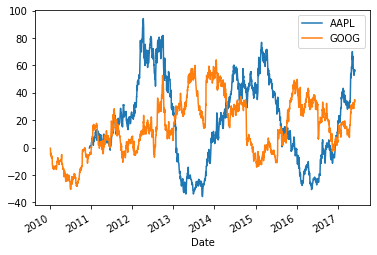

In [ ]:
# Import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(1 + period_returns) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()


# **Generate random numbers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


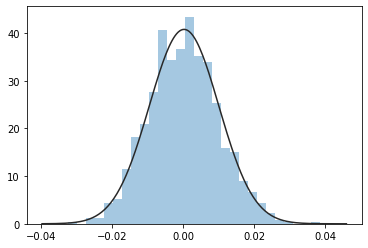

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import normal, seed
from scipy.stats import norm
seed(42)

random_returns = normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)
plt.show()

# **Create a random price path**

type(random_returns) = <class 'numpy.ndarray'>


array([ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153])

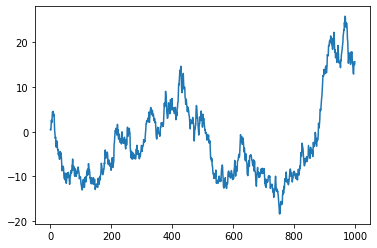

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal, seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0, scale=0.01, size=1000)
print(f"type(random_returns) = {type(random_returns)}")
display(random_returns[:5])
print("\n")
# Generate path
return_series = pd.Series(random_returns)
random_prices = (1 + return_series).cumprod()-1
(random_prices * 100).plot()
plt.show()

# **Simulate S&P 500 prices & returns**

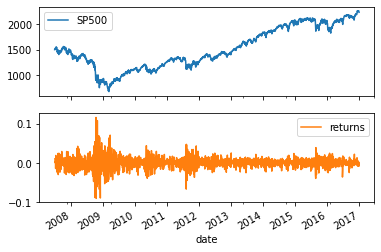

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
data['returns'] = data["SP500"].pct_change()

data.plot(subplots=True)
plt.show()

# **S&P return distribution**



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


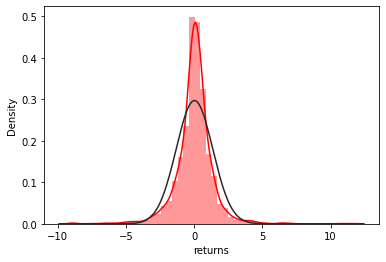

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
data['returns'] = data["SP500"].pct_change()
sns.distplot((data["returns"]*100).dropna(), fit=norm, color="red")

plt.show()

A comparison of the S&P 500 return distribution to the normal distribution shows that the shapes don't match very well. This is a typical finding. <ins>Daily stock returns tend to have outliers more often than the normal distribution</ins> would suggest.

# **Generate random S&P 500 returns**

In [ ]:
from numpy.random import choice
import pandas as pd

data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

print("pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')")
display(pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date').head())

data['returns'] = data["SP500"].pct_change()
print('\ndata["SP500"].pct_change()')
display(data["SP500"].pct_change().head())

sample = data["returns"].dropna()
print('\ndata["SP500"].pct_change().dropna()')
display(data["SP500"].pct_change().dropna().head())


# เลือก returns จากข้อมูลจริง SP500 มาอย่างสุ่ม โดยมีจำนวนตัวอย่างเท่ากับจำนวนตัวอย่างจริงๆของ SP500
# หมายเหตุ choice เลือกค่ามาซ้ำได้
n_obs = data["returns"].count()
random_walk = choice(sample, size=n_obs)
random_walk = pd.Series(random_walk, index=sample.index)
print("\n\npd.Series(random_walk, index=sample.index)")
random_walk.head()

pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')


,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44



data["SP500"].pct_change()


date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
Name: SP500, dtype: float64


data["SP500"].pct_change().dropna()


date
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
2007-07-09    0.000921
Name: SP500, dtype: float64



pd.Series(random_walk, index=sample.index)


date
2007-07-02    0.002717
2007-07-03    0.005395
2007-07-05   -0.008588
2007-07-06    0.005822
2007-07-09    0.004761
dtype: float64

##  **ฟังก์ชัน choice เลือกค่ามาซ้ำได้**

In [ ]:
print("random_walk.value_counts()")
random_walk.value_counts().head(10)

random_walk.value_counts()


 0.003843    6
-0.003174    6
 0.013439    5
 0.007244    5
 0.009535    5
-0.001374    5
-0.027942    5
 0.010593    4
 0.005507    4
 0.002783    4
dtype: int64

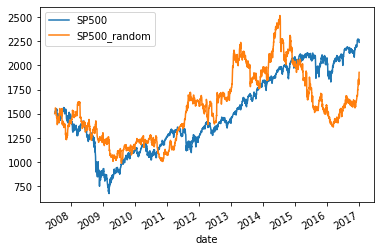

In [ ]:
from numpy.random import choice
import pandas as pd

data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
data['returns'] = data["SP500"].pct_change()
sample = data["returns"].dropna()
n_obs = data["returns"].count()
random_walk = choice(sample, size=n_obs)
random_walk = pd.Series(random_walk, index=sample.index)
start = data['SP500'].first('D')
sp500_random = start.append(1 + random_walk)


data['SP500_random'] = sp500_random.cumprod()
data[['SP500', 'SP500_random']].plot()
plt.show()

### **Random walk I**

* Set `seed` to `42`.
* Use `normal` to generate 2,500 random returns with the parameters `loc=.001`, `scale=.01` and assign this to `random_walk`.
* Convert `random_walk` to a `pd.Series` object and reassign it to `random_walk`.
* Create `random_prices` by adding 1 to `random_walk` and calculating the cumulative product.
* Multiply `random_prices` by 1,000 and plot the result for a price series starting at 1,000.

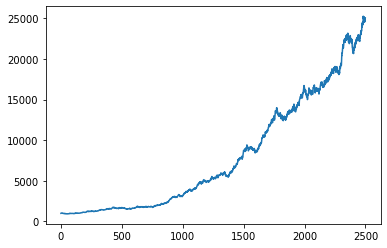

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal, seed

# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = (1 + random_walk).cumprod()

# Plot random_prices here
(1000*random_prices).plot()
plt.show()

### **Random walk II**

Build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. 

* Set `seed` to `42`.
* Apply `.pct_change()` to generate daily Facebook returns, drop missing values, and assign to `daily_returns`.
* Create a variable `n_obs` that contains the `.count()` of Facebook `daily_returns`.
* Use `choice()` to randomly select `n_obs` samples from `daily_returns, and assign to `random_walk`.
* Convert `random_walk` to a `pd.Series` and reassign it to itself.
* Use `sns.distplot()` to plot the distribution of `random_walk`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


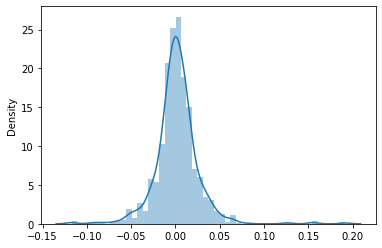

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import choice, seed

fb = pd.read_csv('fb.csv', header=None).rename(columns={0:'date', 1:'price'})
fb['date']  = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)
fb = pd.Series(fb['price'].values, index=fb.index)
fb.head()

# Set seed here


# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk, index=daily_returns.index)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

### **Random walk III**

* Select the first Facebook price by applying `.first('D')` to `fb.price`, and assign to `start`.
* Add 1 to `random_walk` and reassign it to itself, then `.append()` `random_walk` to start and assign this to `random_price`.
* Apply `.cumprod()` to `random_price` and reassign it to itself.
* Insert `random_price` as new column labeled `random` into `fb` and plot the result.

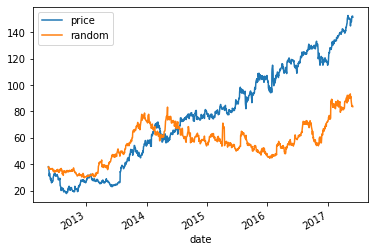

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import choice, seed

fb = pd.read_csv('fb.csv', header=None).rename(columns={0:'date', 1:'price'})
fb['date']  = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)
#seed(42)
daily_returns = pd.Series(fb['price'].values, index=fb.index).pct_change().dropna()
n_obs = daily_returns.count()
random_walk = choice(pd.Series(fb['price'].values, index=fb.index).pct_change().dropna(), size=n_obs)
random_walk = pd.Series(random_walk, index=daily_returns.index)

# Select fb start price here
start = fb['price'].first('D')

# Add 1 to random walk and append to start
random_walk_plus_one = 1 + random_walk
random_price = start.append(random_walk_plus_one)

# Calculate cumulative product here
random_price_1 = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price_1
fb.plot()
plt.show()

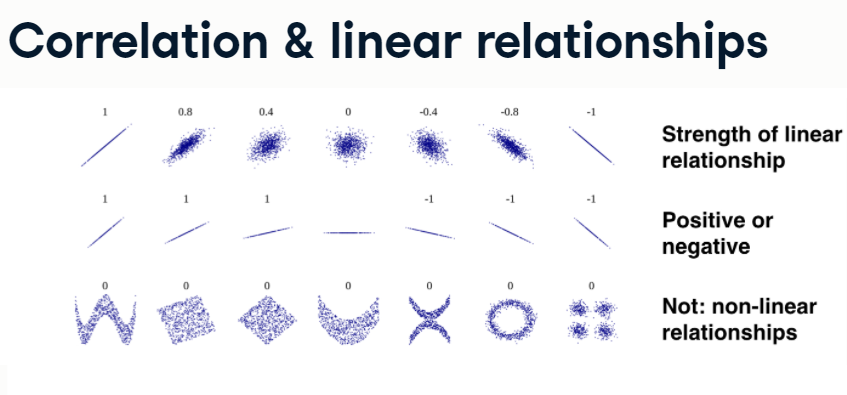

## **Importing four price time series**

In [18]:
import pandas as pd

data = pd.read_csv('asset_classes.csv', parse_dates=['DATE']).rename(columns={"DATE":"date"}).set_index("date").dropna()
data.info()

print("\n\n")
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB





,SP500,Bonds,Gold,Oil
date,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


## **Visualize pairwise linear relationships**

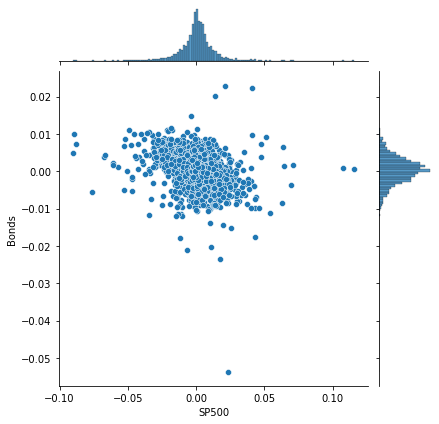

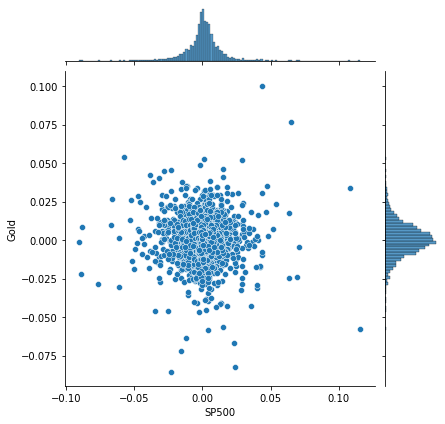

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('asset_classes.csv', parse_dates=['DATE']).rename(columns={"DATE":"date"}).set_index("date").dropna()

daily_returns = data.pct_change()
sns.jointplot(x='SP500', y='Bonds', data=daily_returns)
plt.show()  

## **Correlations**

,SP500,Bonds,Gold,Oil
SP500,1.000000,-0.314890,-0.006546,0.335353
Bonds,-0.314890,1.000000,0.028882,-0.215279
Gold,-0.006546,0.028882,1.000000,0.104272
Oil,0.335353,-0.215279,0.104272,1.000000


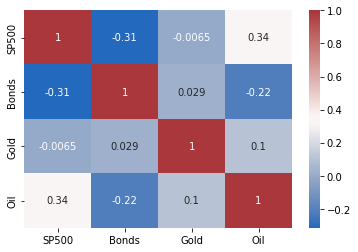

In [40]:
correlations = daily_returns.corr()
display(correlations)
s = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(correlations, annot=True, cmap=s)
plt.show()

### **Annual return correlations among several stocks**

In this exercise, we have provided you with the historical stock prices for Apple (`AAPL`), Amazon (`AMZN`), IBM (`IBM`), WalMart (`WMT`), and Exxon Mobile (`XOM`) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

* Inspect using `.info()`.
* Apply `.resample()` with year-end frequency (alias: `'A'`) to data and select the `.last()` price from each subperiod; assign this to `annual_prices`.
* Calculate `annual_returns` by applying `.pct_change()` to `annual_prices`.
* Calculate correlations by applying `.corr()` to `annual_returns` and print the result.
* Visualize correlations as an annotated `sns.heatmap()`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


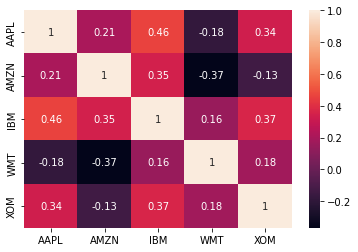

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("5_stocks.csv", parse_dates=["Date"], index_col="Date")

# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()


# **A cap-weighted Index**

* Select the largest company from each sector using their actual stock exchange data as index components
* Calculate the number of shares and corresponding stock prices for each company
* Compute the weights based on these index for each company each period
* Evaluate and compare index performance

## **Load stock listing data**

In [74]:
import pandas as pd

nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
display(nyse.info())
display(nyse.head())

nyse.set_index('Stock Symbol', inplace=True)

print("\n\nThe sectors not having sector's information are likely to be small sectors.\n")
display(nyse[nyse['Sector'].isnull()].sample(5))

# Remove small sectors
nyse.dropna(subset=['Sector'], inplace=True)
nyse['Market Capitalization'] /= 1e6 # in Million USD
print("\n\nNext step nyse: Notice the change in Market Capitalization\n")
display(nyse.info())
display(nyse.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


None

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines




The sectors not having sector's information are likely to be small sectors.



,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
CMRE^D,Costamare Inc.,23.640,0.000000e+00,NaN,NaN,NaN
SUI^A,"Sun Communities, Inc.",25.877,0.000000e+00,NaN,NaN,NaN
RF^A,Regions Financial Corporation,26.040,0.000000e+00,NaN,NaN,NaN
IAE,Voya Asia Pacific High Dividend Equity Income ...,9.980,1.242058e+08,2007.0,NaN,NaN
MGF,MFS Government Markets Income Trust,4.970,1.620276e+08,1987.0,NaN,NaN




Next step nyse: Notice the change in Market Capitalization

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, DDD to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2177 non-null   object 
 1   Last Sale              2175 non-null   float64
 2   Market Capitalization  2177 non-null   float64
 3   IPO Year               967 non-null    float64
 4   Sector                 2177 non-null   object 
 5   Industry               2177 non-null   object 
dtypes: float64(3), object(3)
memory usage: 119.1+ KB


None

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,1647.165276,NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,112736.642168,NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,579.312876,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5225.238185,2013.0,Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,134.735089,NaN,Consumer Services,Newspapers/Magazines


# **Select index components**

## **Pick the largest company by market capitalization using `groupby.nlargest`**

In [85]:
import pandas as pd

nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse.set_index('Stock Symbol', inplace=True)
nyse.dropna(subset=['Sector'], inplace=True)
nyse['Market Capitalization'] /= 1e6 

components = nyse.groupby('Sector')['Market Capitalization'].nlargest(1)
components = components.sort_values(ascending=False)
display(components)

# Import & prepare listing data
tickers = components.index.get_level_values('Stock Symbol')
display(tickers)

columns = ['Company Name', 'Market Capitalization', 'Last Sale']
component_info = nyse.loc[tickers, columns]
pd.options.display.float_format = '{:,.2f}'.format

display(component_info)

Sector                 Stock Symbol
Health Care            JNJ             338834.390080
Energy                 XOM             338728.713874
Finance                JPM             300283.250479
Miscellaneous          BABA            275525.000000
Public Utilities       T               247339.517272
Basic Industries       PG              230159.644117
Consumer Services      WMT             221864.614129
Consumer Non-Durables  KO              183655.305119
Technology             ORCL            181046.096000
Capital Goods          TM              155660.252483
Transportation         UPS              90180.886756
Consumer Durables      ABB              48398.935676
Name: Market Capitalization, dtype: float64

Index(['JNJ', 'XOM', 'JPM', 'BABA', 'T', 'PG', 'WMT', 'KO', 'ORCL', 'TM',
       'UPS', 'ABB'],
      dtype='object', name='Stock Symbol')

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
JNJ,Johnson & Johnson,"338,834.39",124.99
XOM,Exxon Mobil Corporation,"338,728.71",81.69
JPM,J P Morgan Chase & Co,"300,283.25",84.40
BABA,Alibaba Group Holding Limited,"275,525.00",110.21
T,AT&T Inc.,"247,339.52",40.28
PG,Procter & Gamble Company (The),"230,159.64",90.03
WMT,"Wal-Mart Stores, Inc.","221,864.61",73.15
KO,Coca-Cola Company (The),"183,655.31",42.79
ORCL,Oracle Corporation,"181,046.10",44.00


### **Explore and clean company listing information**

To get started with the construction of a ***market-value based index***, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

* Inspect `listings` using `.info()`.
* Move the column `'Stock Symbol'` into the `index` (`inplace`).
* Drop all companies with missing `'Sector'` information from `listings`.
* Select companies with `IPO Year` before `2019`.
* Inspect the result of the changes you just made using `.info()`.
* Show the number of companies per `'Sector'` using `.groupby()` and `.size()`. Sort the output in descending order.

In [4]:
import pandas as pd

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')

# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < '2019']

# Inspect the new listings data
print("\n\nNew listings\n")
print(listings.info())

# Show the number of companies per sector
print("\n\nlistings.groupby('Sector').size().sort_values(ascending=False)\n")
display(listings.groupby('Sector').size().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Exchange               6674 non-null   object        
 1   Stock Symbol           6674 non-null   object        
 2   Company Name           6674 non-null   object        
 3   Last Sale              6590 non-null   float64       
 4   Market Capitalization  6674 non-null   float64       
 5   IPO Year               2852 non-null   datetime64[ns]
 6   Sector                 5182 non-null   object        
 7   Industry               5182 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 417.2+ KB
None


New listings

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----

Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Public Utilities         104
Basic Industries         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Consumer Durables         55
dtype: int64

### **Select and inspect index components**

Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

We have already loaded the `listings` data with the modifications you made during the last exercise.

* Use `.groupby()` and `.nlargest()` to select the largest company by `'Market Capitalization'` for each `'Sector'`, and assign the result to `components`.
* Print `components`, sorted in descending order by market cap.
* Select `Stock Symbol` from the `index` of `components`, assign it to `tickers` and print the result.
* Create a list `info_cols` that holds the column names `Company Name`, `Market Capitalization`, and `Last Sale`. Next, use `.loc[]` with `tickers` and `info_cols` to `print()` more details about the `listings` sorted in descending order by `Market Capitalization`).

In [5]:
import pandas as pd

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010'] # โจทย์ไม่ได้บอกว่ามาเปลี่ยนปีตรงนี้ด้วย

# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print("listings.groupby('Sector')['Market Capitalization'].nlargest(1).sort_values(ascending=False)\n")
display(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values(1)
print("\ntickers = components.index.get_level_values(1)\n")
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print("\n\nlistings.loc[tickers, ['Company Name', 'Market Capitalization', 'Last Sale']].sort_values(by='Market Capitalization', ascending=False)\n")
display(listings.loc[tickers, info_cols].sort_values(by='Market Capitalization', ascending=False))




listings.groupby('Sector')['Market Capitalization'].nlargest(1).sort_values(ascending=False)



Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Miscellaneous          MA              123330.089602
Health Care            AMGN            118927.210535
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Consumer Non-Durables  EL               31122.510011
Capital Goods          ILMN             25409.384000
Energy                 PAA              22223.001416
Consumer Durables      CPRT             13620.922869
Name: Market Capitalization, dtype: float64


tickers = components.index.get_level_values(1)

Index(['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


listings.loc[tickers, ['Company Name', 'Market Capitalization', 'Last Sale']].sort_values(by='Market Capitalization', ascending=False)



,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
AAPL,Apple Inc.,740024.467000,141.05
AMZN,"Amazon.com, Inc.",422138.530626,884.67
MA,Mastercard Incorporated,123330.089602,111.22
AMGN,Amgen Inc.,118927.210535,161.61
UPS,"United Parcel Service, Inc.",90180.886756,103.74
GS,"Goldman Sachs Group, Inc. (The)",88840.590477,223.32
RIO,Rio Tinto Plc,70431.476895,38.94
TEF,Telefonica SA,54609.806092,10.84
EL,"Estee Lauder Companies, Inc. (The)",31122.510011,84.94


# **Import index component price information**

Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

* Use `pd.read_csv()` to import `'stock_prices.csv'`, parsing the `'Date'` column and also setting the `'Date'` column as `index` before assigning the result to `stock_prices`. Inspect the result using `.info()`.
* Calculate the price return for the `index` components by dividing the last row of `stock_prices` by the first, subtracting `1` and multiplying by `100`. Assign the result to `price_return`.
* Plot a horizontal bar chart of the sorted returns with the title `Stock Price Returns`.

['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


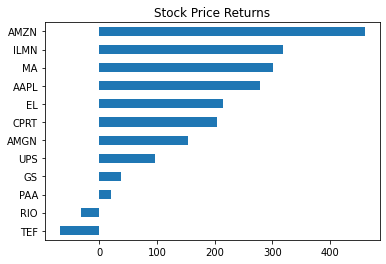

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010'] # โจทย์ไม่ได้บอกว่ามาเปลี่ยนปีตรงนี้ด้วย
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()

# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date').drop(columns='Unnamed: 0')
print(stock_prices.info())

# Calculate the returns
price_return = (stock_prices.iloc[-1]/stock_prices.iloc[0]-1)*100

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh')
plt.title('Stock Price Returns')
plt.show()



# **Build a market-cap weighted index**

* Calculate the number of shares from
  * Market Capitalization = Num_Shares $\times$ Price of each share
    *  $\text{Num_Shares}$ = $\dfrac{\text{Market Capitalization}}{\text{Price of each share}}$
  * Historical stock price series

* Normalize index to start at 100


In [1]:
import pandas as pd

nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse.set_index('Stock Symbol', inplace=True)
nyse.dropna(subset=['Sector'], inplace=True)
nyse['Market Capitalization'] /= 1e6 
components = nyse.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values('Stock Symbol')
columns = ['Company Name', 'Market Capitalization', 'Last Sale']
component_info = nyse.loc[tickers, columns]
component_info

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
PG,Procter & Gamble Company (The),230159.644117,90.03
TM,Toyota Motor Corp Ltd Ord,155660.252483,104.18
ABB,ABB Ltd,48398.935676,22.63
KO,Coca-Cola Company (The),183655.305119,42.79
WMT,"Wal-Mart Stores, Inc.",221864.614129,73.15
XOM,Exxon Mobil Corporation,338728.713874,81.69
JPM,J P Morgan Chase & Co,300283.250479,84.40
JNJ,Johnson & Johnson,338834.390080,124.99
BABA,Alibaba Group Holding Limited,275525.000000,110.21


# **Calculating Number of Shares**

$$\text{Num_Shares} = \dfrac{\text{Market Capitalization}}{\text{Price of each share}}$$

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
shares = component_info['Market Capitalization'].div(component_info['Last Sale'])
shares

Stock Symbol
PG     2,556.48
TM     1,494.15
ABB    2,138.71
KO     4,292.01
WMT    3,033.01
XOM    4,146.51
JPM    3,557.86
JNJ    2,710.89
BABA   2,500.00
T      6,140.50
ORCL   4,114.68
UPS      869.30
dtype: float64

# **Historical stock prices** (Only UPS here)

In [10]:
data = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date').loc[:, 'UPS'] # Only UPS is available from what I could find
market_cap_series = data.mul(shares.loc['UPS'])
market_cap_series

Date
2010-01-04    50,575.71
2010-01-05    50,662.64
2010-01-06    50,288.84
2010-01-07    49,906.35
2010-01-08    52,305.61
                ...    
2016-12-23   100,812.39
2016-12-27   100,951.48
2016-12-28   100,143.03
2016-12-29    99,951.79
2016-12-30    99,656.23
Name: UPS, Length: 1762, dtype: float64

# **From stock prices to market value** (Only UPS here)



In [14]:
market_cap_series.first('D').append(market_cap_series.last('D'))

Date
2010-01-04   50,575.71
2016-12-30   99,656.23
Name: UPS, dtype: float64

# **Aggregate market value per period**

### ***ถ้ามีหลายหุ้น ต้องเอามารวมก่อนแบบนี้ โค้ดด้านล่างไม่ได้รวมเพราะไม่มีข้อมูลหุ้นตัวอื่น***
```
agg_mcap = market_cap_series.sum(axis=1) 
agg_mcap(title='Aggregate Market Cap')
```

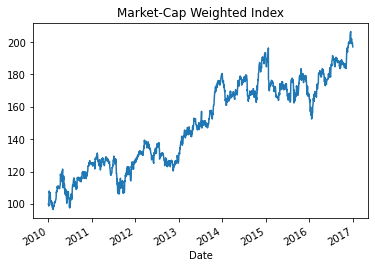

In [17]:
import matplotlib.pyplot as plt

index = market_cap_series.div(market_cap_series.iloc[0]).mul(100) # Divide by 1st value
index.plot(title='Market-Cap Weighted Index')
plt.show()

### **Calculate number of shares outstanding**

The next step towards building a value-weighted index is to ***calculate the number of shares*** for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

* Inspect `listings` and print `tickers`.
* Use `.loc[]` with the list of `tickers` to select the `index` components and the columns `'Market Capitalization'` and '`Last Sale'`; assign this to `components`.
* Print the first five rows of `components`.
* Create `no_shares` by dividing `Market Capitalization` by `'Last Sale'`.
* Print `no_shares` in descending order.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010'] # โจทย์ไม่ได้บอกว่ามาเปลี่ยนปีตรงนี้ด้วย
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()

# Print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print("\nlistings.loc[tickers, ['Market Capitalization', 'Last Sale']]\n")
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization']/components['Last Sale']

# Print the sorted no_shares
print("\ncomponents['Market Capitalization']/components['Last Sale']\n")
print(no_shares.sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, ACU to YPF
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Exchange               1015 non-null   object        
 1   Company Name           1015 non-null   object        
 2   Last Sale              1015 non-null   float64       
 3   Market Capitalization  1015 non-null   float64       
 4   IPO Year               1015 non-null   datetime64[ns]
 5   Sector                 1015 non-null   object        
 6   Industry               1015 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 63.4+ KB
None
['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']

listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                       70,431.48      38.9

### **Create time series of market value**

You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

* Select the `'Number of Shares'` from `components`, assign to `no_shares`, and print the result, sorted in the default (ascending) order.
* Multiply `stock_prices` by `no_shares` to create a time series of market cap per ticker, and assign it to `market_cap`.
* Select the first and the last row of `market_cap` and assign these to `first_value` and `last_value`.
* Use `pd.concat()` to concatenate `first_value` and `last_value` along `axis=1` and plot the result as horizontal bar chart.

stock_prices



,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17



no_shares



Stock Symbol
RIO    1,808.72
ILMN     146.30
CPRT     459.39
EL       366.41
AMZN     477.17
PAA      723.40
GS       397.82
AMGN     735.89
MA     1,108.88
TEF    5,037.80
AAPL   5,246.54
UPS      869.30
dtype: float64



It is unbelievable that multiplication will automatically multiply the corresponding tickers, e.g.,
RIO 2010-01-04 = Date
2010-01-04   56.03
2010-01-05   56.90
Name: RIO, dtype: float64
no_shares['RIO'] = 1808.717948


stock_prices.loc['2010-01-04':'2010-01-05','RIO'] * no_shares['RIO'] =
 Date
2010-01-04   101,342.47
2010-01-05   102,916.05
Name: RIO, dtype: float64


nmarket_cap.loc['2010-01-04':'2010-01-05','RIO']



Date
2010-01-04   101,342.47
2010-01-05   102,916.05
Name: RIO, dtype: float64

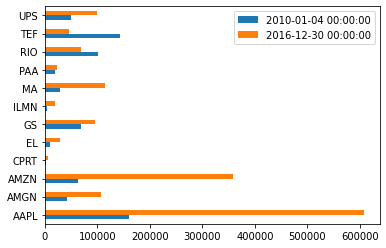

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date').drop(columns='Unnamed: 0')
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010'] # โจทย์ไม่ได้บอกว่ามาเปลี่ยนปีตรงนี้ด้วย
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
no_shares = components['Market Capitalization']/components['Last Sale']
components['Number of Shares'] = no_shares

print("stock_prices\n")
display(stock_prices.head())

print("\nno_shares\n")
display(no_shares)

print("\n\nIt is unbelievable that multiplication will automatically multiply the corresponding tickers, e.g.,")
print(f"RIO 2010-01-04 = {stock_prices.loc['2010-01-04':'2010-01-05','RIO']}")
print(f"no_shares['RIO'] = {no_shares['RIO']}")
print(f"\n\nstock_prices.loc['2010-01-04':'2010-01-05','RIO'] * no_shares['RIO'] =\n {stock_prices.loc['2010-01-04':'2010-01-05','RIO'] * no_shares['RIO']}")
# Create the series of market cap per ticker
market_cap = stock_prices * no_shares

print("\n\nnmarket_cap.loc['2010-01-04':'2010-01-05','RIO']\n")
display(market_cap.loc['2010-01-04':'2010-01-05','RIO'])

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind="barh")
plt.show()



### **Calculate & plot the composite index**

By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also loaded `components` and `market_cap_series`, which you worked with in the last exercise.

* Aggregate the market cap per trading day by applying `.sum()` to `market_cap_series` with `axis=1`, assign to `raw_index` and print the result.
* Normalize the aggregate market cap by dividing by the first value of raw_index and multiplying by `100`. Assign this to index and print the result.
* Plot the `index` with the title `'Market-Cap Weighted Index'`.

market_cap_series.sum(axis=1)
Date
2010-01-04     694,817.64
2010-01-05     697,995.70
2010-01-06     694,685.66
2010-01-07     691,241.61
2010-01-08     695,847.58
                 ...     
2016-12-23   1,588,874.25
2016-12-27   1,599,280.31
2016-12-28   1,593,635.29
2016-12-29   1,589,421.91
2016-12-30   1,574,861.63
Length: 1762, dtype: float64
Date
2010-01-04   100.00
2010-01-05   100.46
2010-01-06    99.98
2010-01-07    99.49
2010-01-08   100.15
              ...  
2016-12-23   228.68
2016-12-27   230.17
2016-12-28   229.36
2016-12-29   228.75
2016-12-30   226.66
Length: 1762, dtype: float64


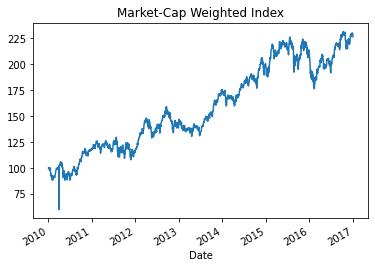

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date').drop(columns='Unnamed: 0')
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010'] # โจทย์ไม่ได้บอกว่ามาเปลี่ยนปีตรงนี้ด้วย
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
no_shares = components['Market Capitalization']/components['Last Sale']
components['Number of Shares'] = no_shares
market_cap_series = stock_prices * no_shares

# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print("market_cap_series.sum(axis=1)")
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot()
plt.title('Market-Cap Weighted Index')
plt.show()



# **Evaluate index performance**

* Index return:
  * Total index return
  * Contribution by component
* Performance vs Benchmark
  * Total period return
  * Rolling returns for sub periods

# **Value-based index - recap**

Contribution of each stock to the total value

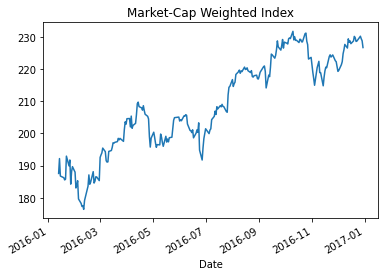

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date').drop(columns='Unnamed: 0')
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010'] # โจทย์ไม่ได้บอกว่ามาเปลี่ยนปีตรงนี้ด้วย
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
no_shares = components['Market Capitalization']/components['Last Sale']
components['Number of Shares'] = no_shares
market_cap_series = stock_prices * no_shares

agg_market_cap = market_cap_series.sum(axis=1)
index = agg_market_cap.div(agg_market_cap.iloc[0]).mul(100)
index['2016-01-13':].plot(title='Market-Cap Weighted Index')
plt.show()

# **Value contribution by stock**

In [56]:
agg_market_cap.iloc[-1] - agg_market_cap.iloc[0]

change = market_cap_series.first('D').append(market_cap_series.last('D'))

print("change = market_cap_series.first('D').append(market_cap_series.last('D'))")
display(change = market_cap_series.first('D').append(market_cap_series.last('D')))

print("\nchange.diff()\n")
display(change.diff())

print("\nchange.diff().iloc[-1]\n")
display(change.diff().iloc[-1])

print("\nchange.diff().iloc[-1].sort_values()\n")
display(change.diff().iloc[-1].sort_values())


change = market_cap_series.first('D').append(market_cap_series.last('D'))

change.diff()



,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016-12-30,"447,267.53","65,118.92","293,922.79","4,272.33","19,133.71","26,403.14","14,262.79","86,016.14","3,826.81","-31,779.17","-97,481.53","49,080.52"



change.diff().iloc[-1]



AAPL   447,267.53
AMGN    65,118.92
AMZN   293,922.79
CPRT     4,272.33
EL      19,133.71
GS      26,403.14
ILMN    14,262.79
MA      86,016.14
PAA      3,826.81
RIO    -31,779.17
TEF    -97,481.53
UPS     49,080.52
Name: 2016-12-30 00:00:00, dtype: float64


change.diff().iloc[-1].sort_values()



TEF    -97,481.53
RIO    -31,779.17
PAA      3,826.81
CPRT     4,272.33
ILMN    14,262.79
EL      19,133.71
GS      26,403.14
UPS     49,080.52
AMGN    65,118.92
MA      86,016.14
AMZN   293,922.79
AAPL   447,267.53
Name: 2016-12-30 00:00:00, dtype: float64

# **Market-cap based weights**



In [57]:
market_cap = components['Market Capitalization']

print("market_cap = components['Market Capitalization']\n")
display(components['Market Capitalization'])

weights = market_cap.div(market_cap.sum())
print("\nmarket_cap.div(market_cap.sum())\n")
display(market_cap.div(market_cap.sum()))

print("\nmarket_cap.div(market_cap.sum()).sort_values().mul(100)\n")
weights.sort_values().mul(100)

market_cap = components['Market Capitalization']



Stock Symbol
RIO     70,431.48
ILMN    25,409.38
CPRT    13,620.92
EL      31,122.51
AMZN   422,138.53
PAA     22,223.00
GS      88,840.59
AMGN   118,927.21
MA     123,330.09
TEF     54,609.81
AAPL   740,024.47
UPS     90,180.89
Name: Market Capitalization, dtype: float64


market_cap.div(market_cap.sum())



Stock Symbol
RIO    0.04
ILMN   0.01
CPRT   0.01
EL     0.02
AMZN   0.23
PAA    0.01
GS     0.05
AMGN   0.07
MA     0.07
TEF    0.03
AAPL   0.41
UPS    0.05
Name: Market Capitalization, dtype: float64


market_cap.div(market_cap.sum()).sort_values().mul(100)



Stock Symbol
CPRT    0.76
PAA     1.23
ILMN    1.41
EL      1.73
TEF     3.03
RIO     3.91
GS      4.93
UPS     5.01
AMGN    6.60
MA      6.85
AMZN   23.44
AAPL   41.09
Name: Market Capitalization, dtype: float64

# **Value-weighted component returns**

In [59]:
# agg_market_cap = market_cap_series.sum(axis=1)
# index = agg_market_cap.div(agg_market_cap.iloc[0]).mul(100)

index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
index_return

126.65826661173823

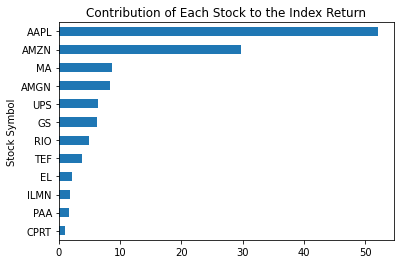

In [62]:
# market_cap = components['Market Capitalization']
# weights = market_cap.div(market_cap.sum())

weighted_returns = weights.mul(index_return)
weighted_returns.sort_values().plot(kind='barh', title='Contribution of Each Stock to the Index Return')
plt.show()

# **Performance vs Benchmark**

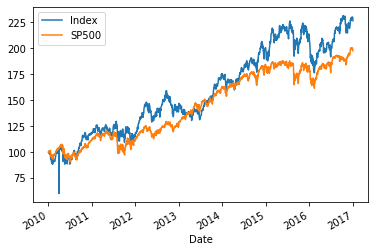

In [67]:
# components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
# no_shares = components['Market Capitalization']/components['Last Sale']
# market_cap_series = stock_prices * no_shares
# agg_market_cap = market_cap_series.sum(axis=1)
# index = agg_market_cap.div(agg_market_cap.iloc[0]).mul(100)

data = index.to_frame('Index') # Convert pd.Series to pd.DataFrame
data['SP500'] = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
data['SP500'] = data['SP500'].div(data['SP500'].iloc[0], axis=0).mul(100)
data.plot()
plt.show()

# **Performance vs benchmark: 30D rolling return**



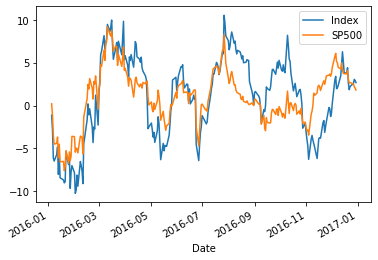

In [71]:
import numpy as np

def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

data["2016":].pct_change().rolling('30D').apply(multi_period_return).plot()
plt.show()

### **Calculate the contribution of each stock to the index**

You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.

* Divide the last `index` value by the first, subtract `1` and multiply by `100`. Assign the result to `index_return` and print it.
* Select the `'Market Capitalization'` column from `components`.
* Calculate the total market cap for all components and assign this to `total_market_cap`.
* Divide the `components`' market cap by `total_market_cap` to calculate the `component` weights, assign it to `weights`, and print `weights` with the values sorted in default (ascending) order.
* Multiply `weights` by the `index_return` to calculate the contribution by component, sort the values in ascending order, and plot the result as a horizontal bar chart.

components



,Market Capitalization,Last Sale,Number of Shares
Stock Symbol,,,
RIO,"70,431.48",38.94,"1,808.72"
ILMN,"25,409.38",173.68,146.30
CPRT,"13,620.92",29.65,459.39
EL,"31,122.51",84.94,366.41
AMZN,"422,138.53",884.67,477.17
PAA,"22,223.00",30.72,723.40
GS,"88,840.59",223.32,397.82
AMGN,"118,927.21",161.61,735.89
MA,"123,330.09",111.22,"1,108.88"



index



Date
2010-01-04   100.00
2010-01-05   100.46
2010-01-06    99.98
2010-01-07    99.49
2010-01-08   100.15
              ...  
2016-12-23   228.68
2016-12-27   230.17
2016-12-28   229.36
2016-12-29   228.75
2016-12-30   226.66
Length: 1762, dtype: float64


index_return

126.65826661173823

market_cap = components['Market Capitalization']

Stock Symbol
RIO     70,431.48
ILMN    25,409.38
CPRT    13,620.92
EL      31,122.51
AMZN   422,138.53
PAA     22,223.00
GS      88,840.59
AMGN   118,927.21
MA     123,330.09
TEF     54,609.81
AAPL   740,024.47
UPS     90,180.89
Name: Market Capitalization, dtype: float64
Stock Symbol
CPRT   0.01
PAA    0.01
ILMN   0.01
EL     0.02
TEF    0.03
RIO    0.04
GS     0.05
UPS    0.05
AMGN   0.07
MA     0.07
AMZN   0.23
AAPL   0.41
Name: Market Capitalization, dtype: float64


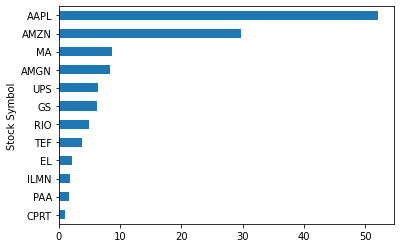

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date').drop(columns='Unnamed: 0')
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010']
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
no_shares = components['Market Capitalization']/components['Last Sale']
components['Number of Shares'] = no_shares
market_cap_series = stock_prices * no_shares
raw_index = market_cap_series.sum(axis=1) 
index = raw_index.div(raw_index.iloc[0]).mul(100)

print("components\n")
display(components)
print("\nindex\n")
display(index)

# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0]-1)*100
print("\nindex_return\n")
print(index_return)

# Select the market capitalization
print("\nmarket_cap = components['Market Capitalization']\n")
market_cap = components['Market Capitalization']
print(market_cap)

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap/total_market_cap
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()



# **Compare index performance against benchmark I**

The next step in analyzing the performance of your index is to compare it against a benchmark.

Above, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

* Convert `index` to a `pd.DataFrame` with the column name `'Index'` and assign the result to data.
* Normalize `djia` to `start` at 100 and add it as new column to data.
* Show the total return for both `index` and `djia` by dividing the last row of data by the first, subtracting 1 and multiplying by 100.
* Show a plot of both of the series in data.

,Index,DJIA
2010-01-04,100.00,100.00
2010-01-05,100.46,99.89
2010-01-06,99.98,99.90
2010-01-07,99.49,100.22
2010-01-08,100.15,100.32


Index   126.66
DJIA     86.72
dtype: float64


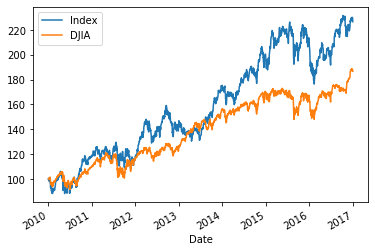

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=["Date"], index_col="Date").drop(columns='Unnamed: 0').dropna(subset=['AAPL', 'AMGN', 'AMZN', 'CPRT', 'ILMN'])
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010']
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
no_shares = components['Market Capitalization']/components['Last Sale']
components['Number of Shares'] = no_shares
market_cap_series = stock_prices * no_shares
raw_index = market_cap_series.sum(axis=1) 
index = raw_index.div(raw_index.iloc[0]).mul(100)

djia = pd.read_csv('djia2.csv', parse_dates=['DATE'], index_col='DATE').squeeze()

display(index.to_frame().merge(djia.to_frame(), left_index=True, right_index=True).rename(columns={0:'Index'}).head())

# Convert index series to dataframe here
data = index.to_frame().rename(columns={0:'Index'})
# data = index.to_frame(name="Index")

# Normalize djia series and add as new column to data
djia = djia/djia[0]*100
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()


ข้อมูลจากไฟล์มีบางอย่างผิดปกติที่ `2010-04-01 `ซึ่งผิดมาจากไฟล์ของคนสอนเอง จาก [แบบฝึกหัดนี้](https://campus.datacamp.com/courses/manipulating-time-series-data-in-python/putting-it-all-together-building-a-value-weighted-index?ex=4) ถ้าไปดู `stock_prices['2010-04']` ก็จะเห็นว่ามีบางตัวข้อมูลเป็น `NaN`

# **Compare index performance against benchmark II**

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

* Inspect `data` and print the first five rows.
* Define a function `multi_period_return` that takes a numpy array of period returns as input, and returns the total return for the period. * Add `1` to the input, pass the result to `np.prod()`, subtract `1` and multiply by `100`.
* Create a `.rolling()` window of length `'360D'` from data, and apply `multi_period_return`. Assign to `rolling_return_360`.
* Plot `rolling_return_360` using the title `'Rolling 360D Return'`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1761 non-null   float64
 1   DJIA    1761 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None



            Index   DJIA
Date                    
2010-01-04 100.00 100.00
2010-01-05 100.46  99.89
2010-01-06  99.98  99.90
2010-01-07  99.49 100.22
2010-01-08 100.15 100.32


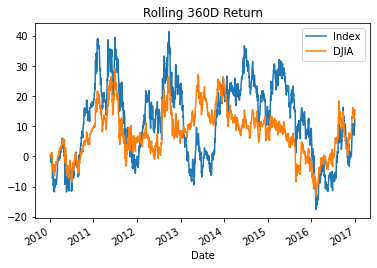

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

data = pd.read_csv("data.csv", parse_dates=["Date"], index_col="Date")
# Inspect data
print(data.info())
print("\n\n")
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(1+r)-1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()




# **Index correlation & exporting to Excel**

In [1]:
import pandas as pd

data = pd.read_csv('stock_prices.csv', parse_dates=["Date"], index_col="Date").drop(columns='Unnamed: 0').dropna(subset=['AAPL', 'AMGN', 'AMZN', 'CPRT', 'ILMN'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
dtypes: float64(12)
memory usage: 178.9 KB


# **Index components: return correlations**

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
AAPL,1.000000,0.286897,0.327609,0.346615,0.307203,0.344936,0.264790,0.391410,0.213218,0.362284,0.325642,0.365854
AMGN,0.286897,1.000000,0.323407,0.355891,0.350240,0.390056,0.336926,0.400222,0.229410,0.314289,0.374783,0.432339
AMZN,0.327609,0.323407,1.000000,0.298928,0.333545,0.333555,0.242725,0.428353,0.181797,0.324952,0.331246,0.378722
CPRT,0.346615,0.355891,0.298928,1.000000,0.372124,0.423141,0.265664,0.401344,0.221438,0.385351,0.377002,0.462583
EL,0.307203,0.350240,0.333545,0.372124,1.000000,0.358901,0.214218,0.431852,0.206117,0.414950,0.428778,0.457273
GS,0.344936,0.390056,0.333555,0.423141,0.358901,1.000000,0.266058,0.466790,0.272202,0.527953,0.498621,0.506240
ILMN,0.264790,0.336926,0.242725,0.265664,0.214218,0.266058,1.000000,0.301388,0.162862,0.234642,0.231291,0.267733
MA,0.391410,0.400222,0.428353,0.401344,0.431852,0.466790,0.301388,1.000000,0.243812,0.437975,0.448571,0.486433
PAA,0.213218,0.229410,0.181797,0.221438,0.206117,0.272202,0.162862,0.243812,1.000000,0.338112,0.253928,0.217260
RIO,0.362284,0.314289,0.324952,0.385351,0.414950,0.527953,0.234642,0.437975,0.338112,1.000000,0.559335,0.509641


Text(0.5, 1.0, 'Daily Return Correlations')

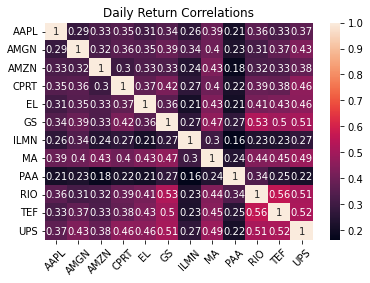

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

daily_returns = data.pct_change()
correlations = daily_returns.corr()
display(correlations)

sns.heatmap(correlations, annot=True)
plt.xticks(rotation=45)
plt.title('Daily Return Correlations')

# **Saving to a single Excel worksheet**

In [4]:
correlations.to_excel(excel_writer= 'correlations.xls', sheet_name='correlations', startrow=1, startcol=1)

In [6]:
data.index  

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1761, freq=None)

In [7]:
data.index.date

array([datetime.date(2010, 1, 4), datetime.date(2010, 1, 5),
       datetime.date(2010, 1, 6), ..., datetime.date(2016, 12, 28),
       datetime.date(2016, 12, 29), datetime.date(2016, 12, 30)],
      dtype=object)

# **Saving to multiple Excel worksheets**

In [8]:
with pd.ExcelWriter('stock_data.xlsx') as writer:
    correlations.to_excel(writer, sheet_name='correlations')
    data.to_excel(writer, sheet_name='prices')
    data.pct_change().to_excel(writer, sheet_name='returns')

### **Visualize your index constituent correlations**

* Inspect `stock_prices` using `.info()`.
* Calculate the daily returns for `stock_prices` and assign the result to `returns`.
* Calculate the pairwise correlations for returns, assign them to `correlations` and print the result.
* Plot a seaborn annotated heatmap of the daily return correlations with the title `'Daily Return Correlations'`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
dtypes: float64(12)
memory usage: 178.9 KB
None
          AAPL      AMGN      AMZN  ...       RIO       TEF       UPS
AAPL  1.000000  0.286897  0.327609  ...  0.362284  0.325642  0.365854
AMGN  0.286897  1.000000  0.323407  ...  0.314289  0.374783  0.432339
AMZN  0.327609  0.323407  1.000000  ...  0.324952  0.331246  0.378722
CPRT  0.346615  0.355891  0.2

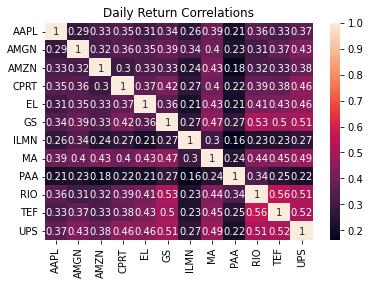

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


stock_prices = pd.read_csv('stock_prices.csv', parse_dates=["Date"], index_col="Date").drop(columns='Unnamed: 0').dropna(subset=['AAPL', 'AMGN', 'AMZN', 'CPRT', 'ILMN'])

# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()



# **Save your analysis to multiple excel worksheets**

* Inspect both `index` and `stock_prices` using `.info()`.
* Use `.join()` to combine `index` with `stock_prices`, and assign to `data`.
* Apply `.pct_change()` to `data` and assign to `returns`.
* Create `pd.ExcelWriter` and use `with` to export `data` and `returns` to excel with `sheet_names` of the same name.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

listings = pd.concat([pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a'), pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')], keys=['amex', 'nasdaq', 'nyse'])
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=["Date"], index_col="Date").drop(columns='Unnamed: 0').dropna(subset=['AAPL', 'AMGN', 'AMZN', 'CPRT', 'ILMN'])
listings = listings.reset_index().drop(columns='level_1').rename(columns={'level_0':'Exchange'})
listings['Market Capitalization'] /= 1e6
listings['IPO Year'] = pd.to_datetime(listings['IPO Year'], format='%Y')
listings.set_index('Stock Symbol', inplace=True)
listings.dropna(subset=['Sector'], inplace=True)
listings = listings[listings['IPO Year'] < '2010']
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
tickers = components.index.get_level_values(1).to_list()
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
no_shares = components['Market Capitalization']/components['Last Sale']
components['Number of Shares'] = no_shares
market_cap_series = stock_prices * no_shares
raw_index = market_cap_series.sum(axis=1) 
index = raw_index.div(raw_index.iloc[0]).mul(100).to_frame(name="Index")

# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1761 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
dtypes: float64(12)
memory usage: 178.9 KB
None
<class 'pandas.core.frame.Da